In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

# FIGURE 1 : CENTRAL BANKS KEY INTEREST RATE

In [165]:

# df_CPI = pdr.get_data_fred('CPIAUCSL', start='1900-01-01', end = '2022-06-30')
df_Fed_Funds = pdr.get_data_fred(['ECBDFR'], start='2000-01-01', end = '2021-01-01')
df_Fed_Funds.index.names = ['Date2']
df_Fed_Funds['Date'] = df_Fed_Funds.index


df_Fed_Funds2 = pdr.get_data_fred(['FEDFUNDS'], start='2000-01-01', end = '2021-01-01')
df_Fed_Funds2.index.names = ['Date2']
df_Fed_Funds2['Date'] = df_Fed_Funds2.index

df_Fed_Funds = df_Fed_Funds.merge(df_Fed_Funds2)
df_Fed_Funds

,ECBDFR,Date,FEDFUNDS
0,2.00,2000-01-01,5.45
1,2.00,2000-02-01,5.73
2,2.25,2000-03-01,5.85
3,2.50,2000-04-01,6.02
4,2.75,2000-05-01,6.27
...,...,...,...
248,-0.50,2020-09-01,0.09
249,-0.50,2020-10-01,0.09
250,-0.50,2020-11-01,0.09
251,-0.50,2020-12-01,0.09


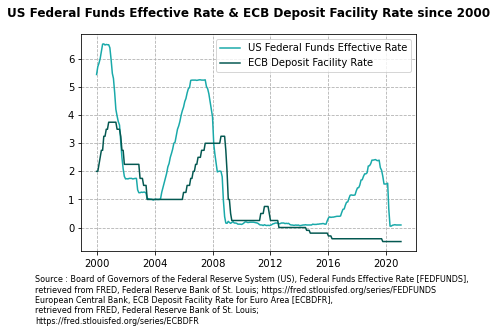

In [976]:
plt.plot(df_Fed_Funds['Date'], df_Fed_Funds['FEDFUNDS'],color ="#19A9A9")
plt.plot(df_Fed_Funds['Date'], df_Fed_Funds['ECBDFR'],color ="#045851")

#plt.xlabel("Sectors",fontweight="bold")
plt.grid(linestyle = 'dashed')
plt.title("US Federal Funds Effective Rate & ECB Deposit Facility Rate since 2000", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Board of Governors of the Federal Reserve System (US), Federal Funds Effective Rate [FEDFUNDS], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FEDFUNDS \nEuropean Central Bank, ECB Deposit Facility Rate for Euro Area [ECBDFR], \nretrieved from FRED, Federal Reserve Bank of St. Louis; \nhttps://fred.stlouisfed.org/series/ECBDFR', (0.10,-0.25), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.legend(['US Federal Funds Effective Rate','ECB Deposit Facility Rate'], loc="upper right")#, bbox_to_anchor=(0.69, 0.8), fontsize=8)#, fancybox=True, framealpha=0.0)
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

In [268]:
df_ECB = pdr.get_data_fred('ECBDFR', start='1960-01-01', end = '2021-01-01')
df_ECB.index.names = ['Date']

Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/')

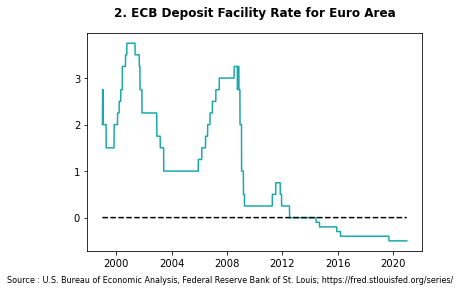

In [278]:
#df_ECB['0'] = 0
plt.plot(df_ECB.index, df_ECB['ECBDFR'],color ="#19A9A9")
#plt.plot(df_ECB.index, df_ECB['0'], '--', color ="#000000")

#plt.xlabel("Sectors",fontweight="bold")
plt.title("2. ECB Deposit Facility Rate for Euro Area", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Economic Analysis, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.0,-0.06), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
#plt.legend(['US PPI All Commodities','Average'], loc="lower center", bbox_to_anchor=(0.5, -0.4))
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 2 : TOTAL DEBT

In [172]:
df_EMU_debt = pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\gov_10q_ggdebt__custom_2130922_page_spreadsheet.xlsx", sheet_name = 'Sheet1')


In [173]:
df_EMU_debt = df_EMU_debt.iloc[:22,:2]
lsit_debt_EMU = list(df_EMU_debt['EMU'])
df_EMU_debt

,Date,EMU
0,2000.0,66.3
1,2001.0,65.5
2,2002.0,65.4
3,2003.0,66.6
4,2004.0,67.0
5,2005.0,67.1
6,2006.0,65.0
7,2007.0,62.3
8,2008.0,65.0
9,2009.0,75.7


In [174]:
import matplotlib.pyplot as plt
df_Total_Debt = pdr.get_data_fred(['GFDEGDQ188S'], start='2000-01-01', end = '2022-06-30').resample('Y').last()
df_Total_Debt = df_Total_Debt.iloc[:-1,:]
df_Total_Debt['EMU'] = lsit_debt_EMU
df_Total_Debt

,GFDEGDQ188S,EMU
DATE,,
2000-12-31,54.25790,66.3
2001-12-31,55.75216,65.5
2002-12-31,57.91028,65.4
2003-12-31,59.44466,66.6
2004-12-31,60.63713,67.0
2005-12-31,61.32008,67.1
2006-12-31,61.82689,65.0
2007-12-31,62.71924,62.3
2008-12-31,73.24516,65.0


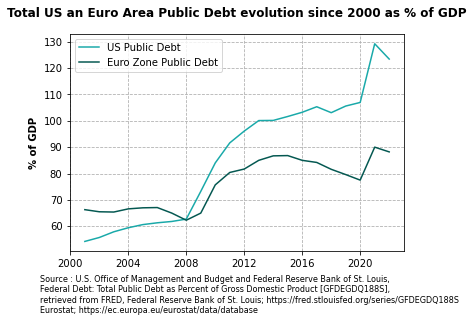

In [176]:
#df_ECB['0'] = 0
plt.plot(df_Total_Debt.index, df_Total_Debt['GFDEGDQ188S'],color ="#19A9A9")
plt.plot(df_Total_Debt.index, df_Total_Debt['EMU'],color ="#045851")
#plt.plot(df_ECB.index, df_ECB['0'], '--', color ="#000000")
plt.grid(linestyle ='dashed')
plt.ylabel("% of GDP",fontweight="bold")
plt.title("Total US an Euro Area Public Debt evolution since 2000 as % of GDP", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Office of Management and Budget and Federal Reserve Bank of St. Louis, \nFederal Debt: Total Public Debt as Percent of Gross Domestic Product [GFDEGDQ188S], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GFDEGDQ188S \nEurostat; https://ec.europa.eu/eurostat/data/database', (0.15,-0.2), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.legend(['US Public Debt','Euro Zone Public Debt'], loc="upper left")#, bbox_to_anchor=(0.20, 0.81))#, fontsize=8, fancybox=True, framealpha=0.0)
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

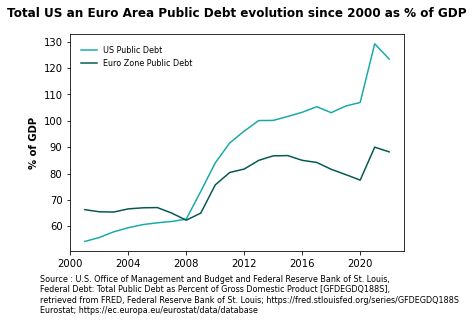

In [32]:
#df_ECB['0'] = 0
plt.plot(df_Total_Debt.index, df_Total_Debt['GFDEGDQ188S'],color ="#19A9A9")
plt.plot(df_Total_Debt.index, df_Total_Debt['EMU'],color ="#045851")
#plt.plot(df_ECB.index, df_ECB['0'], '--', color ="#000000")

plt.ylabel("% of GDP",fontweight="bold")
plt.title("Total US an Euro Area Public Debt evolution since 2000 as % of GDP", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Office of Management and Budget and Federal Reserve Bank of St. Louis, \nFederal Debt: Total Public Debt as Percent of Gross Domestic Product [GFDEGDQ188S], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GFDEGDQ188S \nEurostat; https://ec.europa.eu/eurostat/data/database', (0.15,-0.2), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.legend(['US Public Debt','Euro Zone Public Debt'], loc="lower center", bbox_to_anchor=(0.20, 0.81), fontsize=8, fancybox=True, framealpha=0.0)
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

In [ ]:
#df_ECB['0'] = 0
plt.plot(df_EMU_debt['Date'], df_EMU_debt['EMU'],color ="#19A9A9")
#plt.plot(df_ECB.index, df_ECB['0'], '--', color ="#000000")

plt.ylabel("% of GDP",fontweight="bold")
plt.title("4. Total EMU Public Debt as Percent of GDP", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Eurostat; https://ec.europa.eu/eurostat/data/database', (0.35,-0.06), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
#plt.legend(['US PPI All Commodities','Average'], loc="lower center", bbox_to_anchor=(0.5, -0.4))
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 3 : V SHAPED ECONOMIC RECOVERY

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1 \nEurostat, Real Gross Domestic Product (Euro/ECU series) for Euro area (19 countries) [CLVMEURSCAB1GQEA19], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CLVMEURSCAB1GQEA19,')

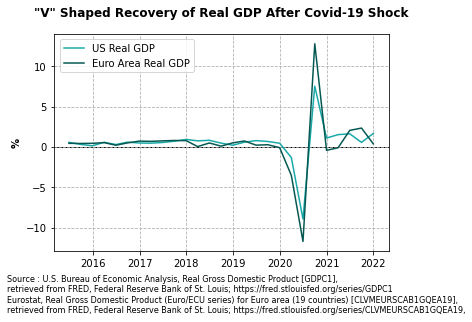

In [177]:
df_GDP = pdr.get_data_fred(['GDP','GDPC1','GDPPOT','CLVMEURSCAB1GQEA19'], start='2015-01-01', end = '2021-12-31').resample('Q').last().pct_change() * 100
df_GDP['Date'] = ''
for i in range(len(df_GDP.index)):
    df_GDP['Date'].iloc[i] = int(df_GDP.index[i].strftime("%y")) + 2000
width = 0.3
#plt.bar(df_final.index, df_final['IPOs'], width=width, color = "#19A9A9")
#plt.plot(np.arange(len(df_GDP))- 0.15, df_GDP['GDPPOT'],'--' ,color = '#684605')
#plt.bar(np.arange(len(df_GDP))- 0.15, df_GDP['GDP'], width=width, color = "#19A9A9")
plt.plot(df_GDP.index, df_GDP['GDPC1'],  color ='#19A9A9')
plt.plot(df_GDP.index, df_GDP['CLVMEURSCAB1GQEA19'],  color ='#045851')
plt.axhline(y=0, c="black", linewidth=1, zorder=0)
#plt.bar(np.arange(len(df_perf_final))+ 0.15, df_perf_final['S&P500'], width=width, color ='#045154')
#X_axis = np.arange(len(df_GDP))
#plt.xticks(X_axis, df_GDP['Date'], rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['US Real GDP', 'Euro Area Real GDP'], loc="lower center", bbox_to_anchor=(0.22, 0.8))
plt.ylabel("%",fontweight="bold")
#plt.xlabel("Sectors",fontweight="bold")
plt.title('"V" Shaped Recovery of Real GDP After Covid-19 Shock', fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1 \nEurostat, Real Gross Domestic Product (Euro/ECU series) for Euro area (19 countries) [CLVMEURSCAB1GQEA19], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CLVMEURSCAB1GQEA19,', (0.10,-0.20), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 4 : COMMODITIES PRICES 

### FAIRE LA MOYENNE DES PRIX PUIS REG AVEC BS DE LA FED ? 

In [193]:
from datetime import datetime as dt
start_date = dt(2010, 12, 31)
end_date = dt(2022,1,1)
Commo_tickers = ['GC=F','SI=F','HG=F','CL=F','BZ=F','NG=F','ZC=F','ZO=F','KE=F','ZR=F','ZS=F','GF=F','HE=F','LE=F','CC=F','KC=F','CT=F','LBS=F','OJ=F']
df_Commo = pdr.get_data_yahoo(Commo_tickers, start = start_date, end = end_date)['Adj Close']
df_Commo

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-12-31,1421.099976,30.910000,4.4395,91.379997,94.750000,4.405,629.00,394.00,851.00,1399.5,1393.75,121.875000,79.750000,107.900002,3035.0,240.500000,144.809998,302.000000,NaN
2011-01-03,1422.599976,31.096001,4.4515,91.550003,94.839996,4.650,620.50,398.00,863.00,1418.5,1370.25,121.250000,77.974998,106.974998,NaN,NaN,142.199997,313.000000,NaN
2011-01-04,1378.500000,29.492001,4.3635,89.379997,93.529999,4.669,608.50,393.75,849.25,1388.5,1361.00,121.000000,77.300003,106.175003,2932.0,234.949997,143.779999,305.000000,NaN
2011-01-05,1373.400024,29.173000,4.4015,90.300003,95.500000,4.473,619.25,389.25,873.25,1382.5,1386.00,120.974998,78.025002,106.625000,2852.0,233.000000,145.199997,313.000000,NaN
2011-01-06,1371.400024,29.110001,4.3210,88.379997,94.519997,4.434,602.00,377.75,858.50,1365.5,1369.50,121.925003,79.775002,106.724998,2830.0,233.000000,141.220001,308.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1808.099976,22.979000,4.4650,75.570000,78.599998,4.060,614.75,724.00,847.00,1434.0,1362.50,162.399994,83.650002,137.300003,2461.0,227.050003,112.279999,1097.400024,139.399994
2021-12-28,1810.199951,23.111000,4.4200,75.980003,78.940002,4.055,604.75,702.50,821.75,1446.5,1359.25,163.550003,82.625000,138.475006,2485.0,225.600006,110.050003,1142.400024,140.300003
2021-12-29,1805.099976,22.848000,4.4020,76.559998,79.230003,4.024,605.50,695.25,824.50,1455.0,1356.50,165.875000,83.824997,139.399994,2515.0,228.899994,112.989998,1169.400024,136.699997


In [179]:
df_Commo = df_Commo.resample('Y').last().pct_change()
df_Commo

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,0.101823,-0.098188,-0.227053,0.081528,0.133298,-0.321453,0.027822,-0.214467,-0.157462,0.043587,-0.140090,0.200821,0.057053,0.139018,-0.305107,-0.056757,-0.366066,-0.181788,NaN
2012-12-31,0.069613,0.082439,0.061052,-0.070930,0.034736,0.121111,0.080046,0.122779,0.158996,0.017460,0.183771,0.034506,0.016904,0.056957,0.060218,-0.366101,-0.181482,0.513153,NaN
2013-12-31,-0.282362,-0.359063,-0.054793,0.071880,-0.002790,0.262310,-0.395632,0.019424,-0.229242,0.043742,-0.074890,0.101057,-0.003500,0.035412,0.211538,-0.230181,0.126431,-0.036908,NaN
2014-12-31,-0.014976,-0.195150,-0.175214,-0.458748,-0.482581,-0.317021,-0.059242,-0.142555,-0.021858,-0.259188,-0.223429,0.316437,-0.049459,0.231970,0.074197,0.504968,-0.287925,-0.080533,NaN
2015-12-31,-0.104401,-0.115002,-0.251189,-0.304674,-0.349730,-0.191070,-0.096348,-0.284774,-0.252195,0.006527,-0.145205,-0.239462,-0.263547,-0.180447,0.103436,-0.239496,0.049942,-0.221987,NaN
2016-12-31,0.084599,0.156878,0.175018,0.450324,0.505633,0.593496,-0.018815,0.051784,-0.106724,-0.191094,0.143759,-0.218394,0.106187,-0.123711,-0.337901,0.081689,0.116467,0.229037,NaN
2017-12-31,0.135913,0.070532,0.313113,0.124721,0.186531,-0.207035,-0.003551,0.054705,0.020908,0.248530,-0.044907,0.119203,0.085034,0.033613,-0.110066,-0.079168,0.112951,0.415035,NaN
2018-12-31,-0.021435,-0.095369,-0.198658,-0.248428,-0.215015,-0.004402,0.069138,0.142116,0.143944,-0.135702,-0.072761,0.019521,-0.150470,0.014634,0.276956,-0.192948,-0.081775,-0.257812,NaN


In [194]:
df_Commo = df_Commo.resample('Y').last().pct_change().iloc[1:,:]
df_Commo

Symbols,GC=F,SI=F,HG=F,CL=F,BZ=F,NG=F,ZC=F,ZO=F,KE=F,ZR=F,ZS=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,
2011-12-31,0.101823,-0.098188,-0.227053,0.081528,0.133298,-0.321453,0.027822,-0.214467,-0.157462,0.043587,-0.140090,0.200821,0.057053,0.139018,-0.305107,-0.056757,-0.366066,-0.181788,NaN
2012-12-31,0.069613,0.082439,0.061052,-0.070930,0.034736,0.121111,0.080046,0.122779,0.158996,0.017460,0.183771,0.034506,0.016904,0.056957,0.060218,-0.366101,-0.181482,0.513153,NaN
2013-12-31,-0.282362,-0.359063,-0.054793,0.071880,-0.002790,0.262310,-0.395632,0.019424,-0.229242,0.043742,-0.074890,0.101057,-0.003500,0.035412,0.211538,-0.230181,0.126431,-0.036908,NaN
2014-12-31,-0.014976,-0.195150,-0.175214,-0.458748,-0.482581,-0.317021,-0.059242,-0.142555,-0.021858,-0.259188,-0.223429,0.316437,-0.049459,0.231970,0.074197,0.504968,-0.287925,-0.080533,NaN
2015-12-31,-0.104401,-0.115002,-0.251189,-0.304674,-0.349730,-0.191070,-0.096348,-0.284774,-0.252195,0.006527,-0.145205,-0.239462,-0.263547,-0.180447,0.103436,-0.239496,0.049942,-0.221987,NaN
2016-12-31,0.084599,0.156878,0.175018,0.450324,0.505633,0.593496,-0.018815,0.051784,-0.106724,-0.191094,0.143759,-0.218394,0.106187,-0.123711,-0.337901,0.081689,0.116467,0.229037,NaN
2017-12-31,0.135913,0.070532,0.313113,0.124721,0.186531,-0.207035,-0.003551,0.054705,0.020908,0.248530,-0.044907,0.119203,0.085034,0.033613,-0.110066,-0.079168,0.112951,0.415035,NaN
2018-12-31,-0.021435,-0.095369,-0.198658,-0.248428,-0.215015,-0.004402,0.069138,0.142116,0.143944,-0.135702,-0.072761,0.019521,-0.150470,0.014634,0.276956,-0.192948,-0.081775,-0.257812,NaN
2019-12-31,0.188688,0.155187,0.063166,0.344638,0.307957,-0.255442,0.034000,0.060854,-0.005627,0.301139,0.068555,-0.023682,0.171382,-0.000801,0.051325,0.273441,-0.043629,0.218947,NaN


In [195]:
df_map = pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\Applied Data Science - Global Macro Systematic Trading Strategy\mapp.xlsx")
df_map

,Commo ticker,Commodity
0,GC=F,Gold
1,SI=F,Silver
2,HG=F,Copper
3,CL=F,Crude Oil
4,BZ=F,Brent
5,NG=F,Natural Gas
6,ZC=F,Corn
7,ZO=F,Oat
8,KE=F,Wheat
9,ZR=F,Rough Rice


In [196]:
dict_mapping2 = {}
for i in range(len(df_map['Commo ticker'])):
    key = df_map['Commo ticker'].iloc[i]
    val = df_map['Commodity'].iloc[i]
    dict_mapping2[key] = val
dict_mapping2

{'GC=F': 'Gold',
 'SI=F': 'Silver',
 'HG=F': 'Copper',
 'CL=F': 'Crude Oil ',
 'BZ=F': 'Brent',
 'NG=F': 'Natural Gas',
 'ZC=F': 'Corn',
 'ZO=F': 'Oat',
 'KE=F': 'Wheat',
 'ZR=F': 'Rough Rice',
 'ZS=F': 'Soybean ',
 'GF=F': 'Feeder Cattle ',
 'HE=F': 'Lean Hogs',
 'LE=F': 'Live Cattle',
 'CC=F': 'Cocoa',
 'KC=F': 'Coffee',
 'CT=F': 'Cotton',
 'LBS=F': 'Lumber',
 'OJ=F': 'Orange Juice',
 'SB=F': 'Sugar'}

In [197]:
dict_mapping2['GC=F']

'Gold'

In [198]:
for i in range(len(df_Commo.columns)):
    col = df_Commo.columns[i]
    new_col = dict_mapping2[col]
    df_Commo = df_Commo.rename(columns ={col:new_col})
df_Commo

Symbols,Gold,Silver,Copper,Crude Oil,Brent,Natural Gas,Corn,Oat,Wheat,Rough Rice,Soybean,Feeder Cattle,Lean Hogs,Live Cattle,Cocoa,Coffee,Cotton,Lumber,Orange Juice
Date,,,,,,,,,,,,,,,,,,,
2011-12-31,0.101823,-0.098188,-0.227053,0.081528,0.133298,-0.321453,0.027822,-0.214467,-0.157462,0.043587,-0.140090,0.200821,0.057053,0.139018,-0.305107,-0.056757,-0.366066,-0.181788,NaN
2012-12-31,0.069613,0.082439,0.061052,-0.070930,0.034736,0.121111,0.080046,0.122779,0.158996,0.017460,0.183771,0.034506,0.016904,0.056957,0.060218,-0.366101,-0.181482,0.513153,NaN
2013-12-31,-0.282362,-0.359063,-0.054793,0.071880,-0.002790,0.262310,-0.395632,0.019424,-0.229242,0.043742,-0.074890,0.101057,-0.003500,0.035412,0.211538,-0.230181,0.126431,-0.036908,NaN
2014-12-31,-0.014976,-0.195150,-0.175214,-0.458748,-0.482581,-0.317021,-0.059242,-0.142555,-0.021858,-0.259188,-0.223429,0.316437,-0.049459,0.231970,0.074197,0.504968,-0.287925,-0.080533,NaN
2015-12-31,-0.104401,-0.115002,-0.251189,-0.304674,-0.349730,-0.191070,-0.096348,-0.284774,-0.252195,0.006527,-0.145205,-0.239462,-0.263547,-0.180447,0.103436,-0.239496,0.049942,-0.221987,NaN
2016-12-31,0.084599,0.156878,0.175018,0.450324,0.505633,0.593496,-0.018815,0.051784,-0.106724,-0.191094,0.143759,-0.218394,0.106187,-0.123711,-0.337901,0.081689,0.116467,0.229037,NaN
2017-12-31,0.135913,0.070532,0.313113,0.124721,0.186531,-0.207035,-0.003551,0.054705,0.020908,0.248530,-0.044907,0.119203,0.085034,0.033613,-0.110066,-0.079168,0.112951,0.415035,NaN
2018-12-31,-0.021435,-0.095369,-0.198658,-0.248428,-0.215015,-0.004402,0.069138,0.142116,0.143944,-0.135702,-0.072761,0.019521,-0.150470,0.014634,0.276956,-0.192948,-0.081775,-0.257812,NaN
2019-12-31,0.188688,0.155187,0.063166,0.344638,0.307957,-0.255442,0.034000,0.060854,-0.005627,0.301139,0.068555,-0.023682,0.171382,-0.000801,0.051325,0.273441,-0.043629,0.218947,NaN


In [199]:
df_test2 = pd.DataFrame(np.nan, index = df_Commo.columns, columns = ['2020','2021'])
for i in range(len(df_test2.index)):
    for j in range(0,2):
        col = df_test2.index[i]
        perf = df_Commo[col].iloc[j]
        df_test2.iloc[i,j] = perf
df_test2 = df_test2.iloc[:-1,:]
#df_test2 = df_test2.rename(columns = {'2020-12-31':'2020','2021-12-31':'2021'})
df_test2

,2020,2021
Symbols,,
Gold,0.101823,0.069613
Silver,-0.098188,0.082439
Copper,-0.227053,0.061052
Crude Oil,0.081528,-0.070930
Brent,0.133298,0.034736
Natural Gas,-0.321453,0.121111
Corn,0.027822,0.080046
Oat,-0.214467,0.122779
Wheat,-0.157462,0.158996


In [200]:
df_test2 = df_test2 * 100

Text(-80, -20, 'Source : Yahoo! Finance')

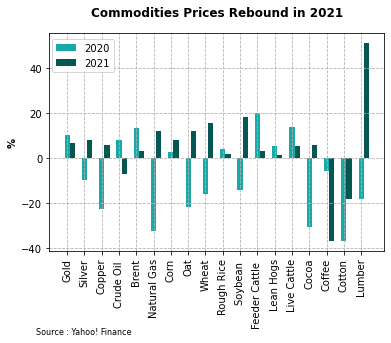

In [202]:
width = 0.3
#plt.bar(df_final.index, df_final['IPOs'], width=width, color = "#19A9A9")
#plt.plot(np.arange(len(df_Commo))- 0.15, df_GDP['GDPPOT'],'--' ,color = '#684605')
#plt.bar(np.arange(len(df_Commo.columns))- 0.15, df_Commo.index, width=width, color = "#19A9A9")
plt.bar(np.arange(len(df_test2)), df_test2['2020'], width=width, color ='#19A9A9')
plt.bar(np.arange(len(df_test2))+ 0.3, df_test2['2021'], width=width, color ='#045851')


#plt.bar(np.arange(len(df_perf_final))+ 0.15, df_perf_final['S&P500'], width=width, color ='#045154')
X_axis = np.arange(len(df_test2.index))
plt.grid(linestyle = 'dashed')
plt.xticks(X_axis, df_test2.index, rotation = 90)
plt.legend(['2020','2021'], loc="lower center", bbox_to_anchor=(0.10, 0.8))
plt.ylabel("%",fontweight="bold")
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Commodities Prices Rebound in 2021", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Yahoo! Finance', (0.2,-0.30), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 5: Breakeven Inflation Rate

In [2]:
df_TIPS = pdr.get_data_fred(['T10YIE','T7YIEM','T5YIE'], start='2010-01-01', end = '2022-06-30')
df_TIPS.index.names = ['Date']
df_TIPS["2"] = 2
# Calculer Moyenne Avant COvid de 2010 à 2020 sur les TIPS 5Y 

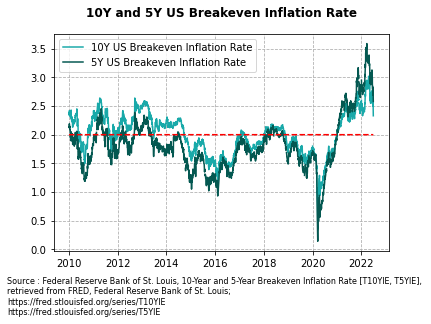

In [3]:
plt.plot(df_TIPS.index, df_TIPS['T10YIE'],color ="#19A9A9")
plt.plot(df_TIPS.index, df_TIPS['T5YIE'],color ="#045851")
plt.plot(df_TIPS.index, df_TIPS['2'], '--',color ="r")
plt.grid(linestyle = 'dashed')
#plt.xlabel("Sectors",fontweight="bold")
plt.title("10Y and 5Y US Breakeven Inflation Rate", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Federal Reserve Bank of St. Louis, 10-Year and 5-Year Breakeven Inflation Rate [T10YIE, T5YIE], \nretrieved from FRED, Federal Reserve Bank of St. Louis; \nhttps://fred.stlouisfed.org/series/T10YIE\nhttps://fred.stlouisfed.org/series/T5YIE', (0.1,-0.21), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.legend(['10Y US Breakeven Inflation Rate','5Y US Breakeven Inflation Rate'], loc="upper left")#, bbox_to_anchor=(0.3, 0.8))
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 6 : CPI AND GDP

Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1 \nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL')

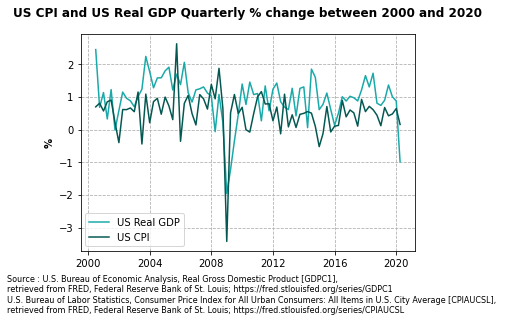

In [208]:
df_CPI = pdr.get_data_fred(['GDP','CPIAUCSL'], start='2000-01-01', end = '2020-01-01').resample('Q').last().pct_change() * 100
plt.plot(df_CPI.index, df_CPI['GDP'],color ="#19A9A9")
plt.plot(df_CPI.index, df_CPI['CPIAUCSL'],color ="#045851")

plt.legend(['US Real GDP','US CPI'], loc="lower center", bbox_to_anchor=(0.16, 0.0))
plt.ylabel("%",fontweight="bold")
plt.grid(linestyle = 'dashed')
plt.title("US CPI and US Real GDP Quarterly % change between 2000 and 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1 \nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL', (0.02,-0.2), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 7 : Real Gross Domestic Product (GDPC1)
Gross Domestic Product (GDP)

In [64]:
df_GDP = pdr.get_data_fred(['GDP','GDPC1','GDPPOT'], start='2009-01-01', end = '2021-12-31').resample('Y').last().pct_change()
df_GDP.index.names = ['Date']
df_GDP = df_GDP *100
df_GDP = df_GDP.iloc[1:,:]


In [65]:
df_GDP['Date'] = ''
for i in range(len(df_GDP.index)):
    df_GDP['Date'].iloc[i] = int(df_GDP.index[i].strftime("%y")) + 2000

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [62]:
df_GDP = pdr.get_data_fred(['GDP','GDPC1','GDPPOT'], start='2009-01-01', end = '2021-12-31').resample('Y').last()
df_GDP

,GDP,GDPC1,GDPPOT
DATE,,,
2009-12-31,14651.248,15379.155,16147.063357
2010-12-31,15309.471,15807.995,16369.305151
2011-12-31,15842.267,16048.702,16627.891654
2012-12-31,16420.386,16300.035,16916.653883
2013-12-31,17133.114,16712.760,17225.802388
2014-12-31,17852.540,17141.235,17550.014792
2015-12-31,18332.079,17462.579,17879.075023
2016-12-31,18968.041,17812.560,18195.876940
2017-12-31,19882.965,18296.685,18516.076051


Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP')

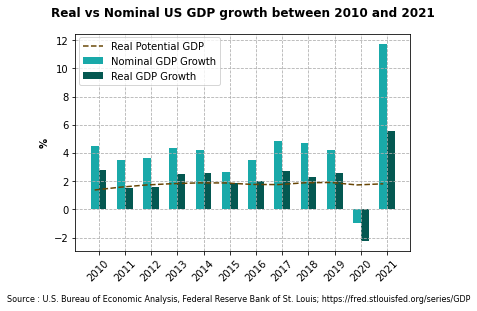

In [66]:

width = 0.3
#plt.bar(df_final.index, df_final['IPOs'], width=width, color = "#19A9A9")
plt.plot(np.arange(len(df_GDP))- 0.15, df_GDP['GDPPOT'],'--' ,color = '#684605')
plt.bar(np.arange(len(df_GDP))- 0.15, df_GDP['GDP'], width=width, color = "#19A9A9")
plt.bar(np.arange(len(df_GDP))+ 0.15, df_GDP['GDPC1'], width=width, color ='#045851')

plt.grid(linestyle = 'dashed')
#plt.bar(np.arange(len(df_perf_final))+ 0.15, df_perf_final['S&P500'], width=width, color ='#045154')
X_axis = np.arange(len(df_GDP))
plt.xticks(X_axis, df_GDP['Date'], rotation = 45)
plt.legend(['Real Potential GDP','Nominal GDP Growth','Real GDP Growth'], loc="lower center", bbox_to_anchor=(0.22, 0.74))
plt.ylabel("%",fontweight="bold" )
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Real vs Nominal US GDP growth between 2010 and 2021", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Economic Analysis, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP', (0.035,-0.15), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
#plt.savefig('Performance', dpi=300,bbox_inches='tight')

# FIGURE 8 : CPI Ponderation 

In [210]:
df = pd.read_excel(r'CPI Comp.xlsx')
df

,Unnamed: 0,China,Germany,USA
0,Food & Beverage,34,16.7,14.8
1,Housing & Utility,13,23.1,37.4
2,Furniture,6,6.1,4.6
3,Apparel,9,5.3,3.7
4,Medical Care,10,4.4,6.5
5,Transportation & Communication,10,17.6,20.1
6,Education & Recreation,14,13.3,9.2
7,Others,4,13.5,3.5


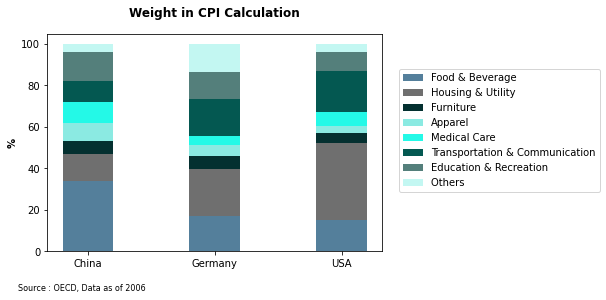

In [213]:
# create data
x = df.columns[1:]
y0 = np.array(df.iloc[0,1:])
y1 = np.array(df.iloc[1,1:])
y2 = np.array(df.iloc[2,1:])
y3 = np.array(df.iloc[3,1:])
y4 = np.array(df.iloc[4,1:])
y5 = np.array(df.iloc[5,1:])
y6 = np.array(df.iloc[6,1:])
y7 = np.array(df.iloc[7,1:])

width = 0.4

# plot bars in stack manner
plt.bar(x, y0, width=width, color='#547F9B')
plt.bar(x, y1, width=width, bottom=y0, color='#6F6F6F')
plt.bar(x, y2, width=width, bottom=y0+y1, color='#043030')
plt.bar(x, y3, width=width, bottom=y0+y1+y2, color='#8BEAE2')
plt.bar(x, y4, width=width, bottom=y0+y1+y2+y3, color='#24F9E7')
plt.bar(x, y5, width=width, bottom=y0+y1+y2+y3+y4, color='#045851')
plt.bar(x, y6, width=width, bottom=y0+y1+y2+y3+y4+y5, color='#547F7B')
plt.bar(x, y7, width=width, bottom=y0+y1+y2+y3+y4+y5+y6, color='#C3F7F2')

#plt.xlabel("Teams")
plt.ylabel("%",fontweight="bold")
plt.title("Weight in CPI Calculation", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : OECD, Data as of 2006', (0.15,-0.10), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.legend(df['Unnamed: 0'], loc="lower center", bbox_to_anchor=(1.35, 0.25))


# FIGURE 9 : US CPI YoY Evolution 

In [567]:
df_test = pd.DataFrame(pdr.get_data_fred(['CPIAUCSL'], start='1970-01-01', end = '2022-06-30')).resample('Y').last().pct_change()
df_test.shape

(53, 1)

Text(-80, -20, 'Source : U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL\nFederal Reserve Bank of Atlanta, Sticky Price Consumer Price Index less Food and Energy [CORESTICKM159SFRBATL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL')

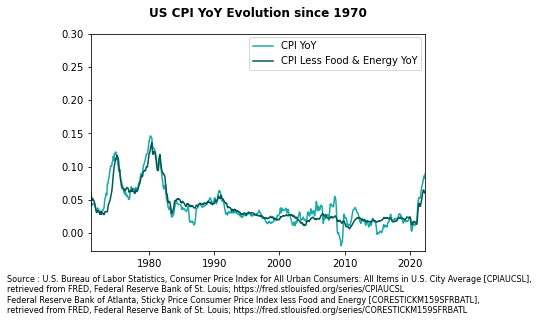

In [968]:
df_test = pd.DataFrame(pdr.get_data_fred(['GDP','CPIAUCSL','USACPICORMINMEI'], start='1970-01-01', end = '2022-06-30')).pct_change(12)
df_test = df_test.rename(columns={'CPIAUCSL':'CPI YoY'})

df_test['2'] = 0.02

#plt.plot(df_test.index, df_test['GDP'], '--', color ="r")
plt.plot(df_test.index, df_test['CPI YoY'],color ="#19A9A9")
plt.plot(df_test.index, df_test['USACPICORMINMEI'],color ="#045851")
plt.xlim(left=df_test.index[12], right = df_test.index[-1])
plt.ylim(top = 0.30)

plt.legend(['CPI YoY','CPI Less Food & Energy YoY'], loc="lower center", bbox_to_anchor=(0.73, 0.81))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("US CPI YoY Evolution since 1970", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL\nFederal Reserve Bank of Atlanta, Sticky Price Consumer Price Index less Food and Energy [CORESTICKM159SFRBATL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL', (-0.01,-0.2), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1\nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL \nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPILFESL')

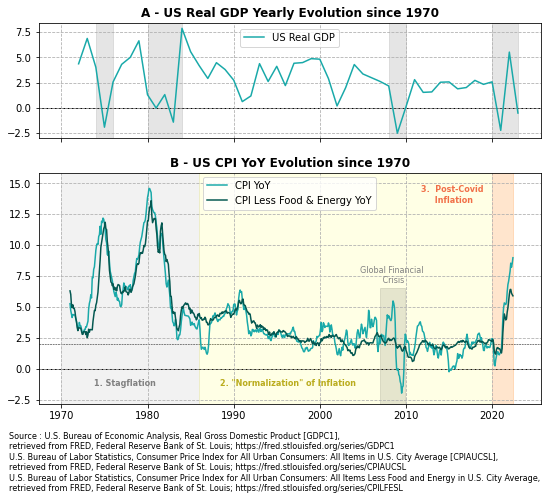

In [3]:
df_test2 = pd.DataFrame(pdr.get_data_fred(['GDPC1','GDPPOT'], start='1970-01-01', end = '2022-06-30')).resample('Y').last().pct_change() * 100
df_test = pd.DataFrame(pdr.get_data_fred(['CPIAUCSL','CPILFESL'], start='1970-01-01', end = '2022-06-30'))


df_test2['xxx'] = np.nan
for i in range(len(df_test2.index)):
    if df_test2['GDPC1'].iloc[i] < 0:
        df_test2['xxx'].iloc[i-1] = True
        df_test2['xxx'].iloc[i] = True
        try:
            df_test2['xxx'].iloc[i+1] = True
        except:
            x = 1
            
df_test['CPIAUCSL'] = df_test['CPIAUCSL'].pct_change(12) * 100
df_test['CPILFESL'] = df_test['CPILFESL'].pct_change(12) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,7), gridspec_kw={'height_ratios': [1, 2]})

ax1.plot(df_test2.index, df_test2['GDPC1'], color='#19A9A9')
#ax1.plot(df_test2.index, df_test2['GDPPOT'], color='#045851')

ax1.set_title("A - US Real GDP Yearly Evolution since 1970", fontweight="bold", x=0.5, y=1.)
ax1.axhline(y=0, c="black", linewidth=1, zorder=0)
ax1.fill_between(df_test2.index, 0, 1, where= df_test2['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.legend(['US Real GDP'], loc="lower center", bbox_to_anchor=(0.5, 0.75))#fancybox=True, framealpha=0.)
#ax1.annotate('- Recession', (0.6,0.2), (-80,-20),color ='grey', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax1.grid(linestyle =  'dashed')

ax2.plot(df_test.index, df_test['CPIAUCSL'], color='#19A9A9')
ax2.plot(df_test.index, df_test['CPILFESL'], color='#045851')

#ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax2.fill_between(df_test.index, 0, 15, where=df_test.index < '1985-12-31',
                color='grey', alpha=0.1, transform=ax2.get_xaxis_transform())

#ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax2.fill_between(df_test.index, 0, 15, where= df_test.index > '1985-12-31',
                color='yellow', alpha=0.1, transform=ax2.get_xaxis_transform())

ax2.fill_between(df_test.index, 0, 15, where= df_test.index > '2019-12-31',
                color='red', alpha=0.1, transform=ax2.get_xaxis_transform())
ax2.axhline(y=0, c="black", linewidth=1, zorder=0)
ax2.axhline(y=2, c="black", linewidth=0.5, zorder=0, linestyle='--')
ax2.grid(linestyle =  'dashed')

df_test['xxx'] = np.nan
for i in range(len(df_test.index)):
    if df_test.index[i] > dt(2006,12,31) and df_test.index[i] < dt(2010, 1,1):
        df_test['xxx'].iloc[i] = True

ax2.fill_between(df_test.index, 0, 0.5, where= df_test['xxx'] == True, 
                 color='k', alpha=0.1, transform=ax2.get_xaxis_transform())
#ax2.grid(linestyle = 'dashed')
ax2.legend(['CPI YoY','CPI Less Food & Energy YoY'], loc="lower center", bbox_to_anchor=(0.5, 0.82))#,fancybox=True, framealpha=0.)
#plt.xlabel("Sectors",fontweight="bold")
ax2.set_title("B - US CPI YoY Evolution since 1970", fontweight="bold", x=0.5, y=1.)
ax2.annotate('1. Stagflation', (0.27,0.155), (-80,-20),color ='grey', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('2. "Normalization" of Inflation', (0.52,0.155), (-80,-20),color ='#BAAC1D', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('3.  Post-Covid\n     Inflation', (0.92,0.95), (-80,-20),color ='#F16F48', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('Global Financial\n         Crisis', (0.8,0.6), (-80,-20),color ='grey', fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1\nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL \nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPILFESL', (0.1,-0.3), (-80,-20), fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 10 : CRUDE OIL PRICE

Text(-80, -20, 'Source : Refinitiv')

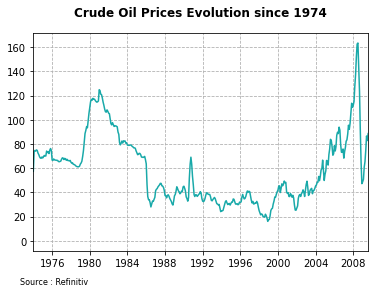

In [771]:
df_test = pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\Applied Data Science - Crude Oil Project\Data.xlsx")

df_test['xxx'] = np.nan
for i in range(len(df_test2.index)):
    if df_test['date'].iloc[i] < dt(1975,1,1):
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1
plt.xlim(df_test['date'].iloc[0],df_test['date'].iloc[-1])
for i in range(len(df_test2.index)):
    if df_test['date'].iloc[i] > dt(1978,12,1) and df_test['date'].iloc[i] < dt(1981,1,1):
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1
plt.fill_between(df_test.index, 0, 0.5, where= df_test['xxx'] == True, 
                 color='k', alpha=0.1)      
plt.plot(df_test['date'], df_test['price'],color ="#19A9A9")
plt.grid( linestyle = 'dashed')
#plt.legend(['Crude Oil Prices'], loc="lower center", bbox_to_anchor=(0.19, 0.87))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Crude Oil Prices Evolution since 1974", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Refinitiv', (0.2,-.07), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

In [763]:
df_test

,date,production,demand,price,inventories
0,1974-01-01,55474.000,66.4531,57.403281,975063
1,1974-02-01,55943.000,70.2119,73.734743,947171
2,1974-03-01,56375.000,64.6946,74.604405,953095
3,1974-04-01,57110.000,71.9592,74.080857,982586
4,1974-05-01,57279.000,62.1424,75.047923,1030035
...,...,...,...,...,...
423,2009-04-01,71999.231,14.7723,65.295706,1797303
424,2009-05-01,71481.904,28.8136,74.654914,1812794
425,2009-06-01,71707.738,24.6451,86.560892,1826007
426,2009-07-01,72518.888,16.7230,82.790288,1831772


Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1\nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL\nFederal Reserve Bank of Atlanta, Sticky Price Consumer Price Index less Food and Energy [CORESTICKM159SFRBATL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL')

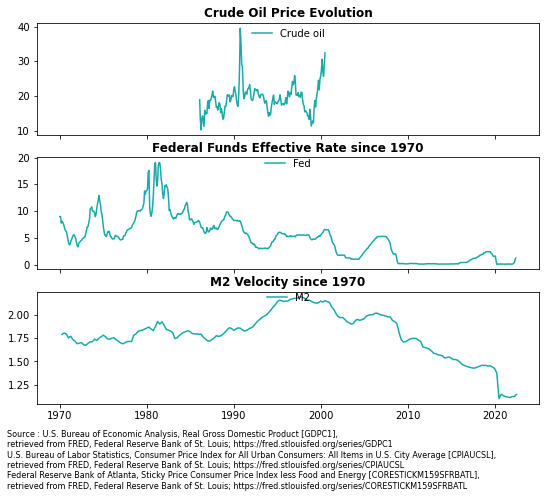

In [709]:
df_test2 = pd.DataFrame(pdr.get_data_fred(['DCOILWTICO'], start='1970-01-01', end = '2000-06-30')).resample('M').last()#.pct_change() * 100
df_test = pd.DataFrame(pdr.get_data_fred(['FEDFUNDS'], start='1970-01-01', end = '2022-06-30'))
df_test3 = pd.DataFrame(pdr.get_data_fred(['M2V'], start='1970-01-01', end = '2022-06-30')).resample('Q').last()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(9,7))#, gridspec_kw={'height_ratios': [1, 2]})

ax1.plot(df_test2.index, df_test2['DCOILWTICO'], color='#19A9A9')
ax1.set_title("Crude Oil Price Evolution", fontweight="bold", x=0.5, y=1.)
#ax1.axhline(y=0, c="black", linewidth=1, zorder=0)

ax1.legend(['Crude oil'], loc="lower center", bbox_to_anchor=(0.5, 0.78),fancybox=True, framealpha=0.)
#ax1.annotate('- Recession', (0.6,0.2), (-80,-20),color ='grey', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')


ax2.plot(df_test.index, df_test['FEDFUNDS'], color='#19A9A9')
ax2.legend(['Fed'], loc="lower center", bbox_to_anchor=(0.5, 0.82),fancybox=True, framealpha=0.)
ax2.set_title("Federal Funds Effective Rate since 1970", fontweight="bold", x=0.5, y=1.)

ax3.plot(df_test3.index, df_test3['M2V'], color='#19A9A9')
ax3.legend(['M2'], loc="lower center", bbox_to_anchor=(0.5, 0.82),fancybox=True, framealpha=0.)
ax3.set_title("M2 Velocity since 1970", fontweight="bold", x=0.5, y=1.)


ax3.annotate('Source : U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1\nU.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL\nFederal Reserve Bank of Atlanta, Sticky Price Consumer Price Index less Food and Energy [CORESTICKM159SFRBATL], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CORESTICKM159SFRBATL', (0.1,-0.6), (-80,-20), fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')

In [13]:
df_test3 = pd.DataFrame(pdr.get_data_fred(['GDP','M2SL','MANMM101USM189S','MABMM301USM189S'], start='1970-01-01', end = '2022-06-30')).resample('Q').last()
df_test3.tail(30)

,GDP,MYAGM2USM052S,MANMM101USM189S,MABMM301USM189S
DATE,,,,
2015-03-31,17991.348,1.183640e+13,2.998400e+12,1.187960e+13
2015-06-30,18193.707,1.197530e+13,3.020900e+12,1.200580e+13
2015-09-30,18306.960,1.215770e+13,3.047000e+12,1.216450e+13
2015-12-31,18332.079,1.231350e+13,3.095800e+12,1.234400e+13
2016-03-31,18425.306,1.257290e+13,3.154000e+12,1.260970e+13
2016-06-30,18611.617,1.280370e+13,3.246100e+12,1.283190e+13
2016-09-30,18775.459,1.301560e+13,3.327700e+12,1.303790e+13
2016-12-31,18968.041,1.318090e+13,3.340900e+12,1.320960e+13
2017-03-31,19153.912,1.338050e+13,3.450500e+12,1.342060e+13


In [14]:
df_test3 = pd.DataFrame(pdr.get_data_fred(['GDP','M2SL','MANMM101USM189S','MABMM301USM189S'], start='1970-01-01', end = '2022-06-30')).resample('Q').last()
df_test3.tail(30)

,GDP,M2SL,MANMM101USM189S,MABMM301USM189S
DATE,,,,
2015-03-31,17991.348,11879.6,2.998400e+12,1.187960e+13
2015-06-30,18193.707,12005.8,3.020900e+12,1.200580e+13
2015-09-30,18306.960,12164.5,3.047000e+12,1.216450e+13
2015-12-31,18332.079,12344.0,3.095800e+12,1.234400e+13
2016-03-31,18425.306,12609.7,3.154000e+12,1.260970e+13
2016-06-30,18611.617,12831.9,3.246100e+12,1.283190e+13
2016-09-30,18775.459,13037.9,3.327700e+12,1.303790e+13
2016-12-31,18968.041,13209.6,3.340900e+12,1.320960e+13
2017-03-31,19153.912,13420.6,3.450500e+12,1.342060e+13


# FIGURE 11 : BREAKDOWN CPI

Text(-80, -20, 'Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/')

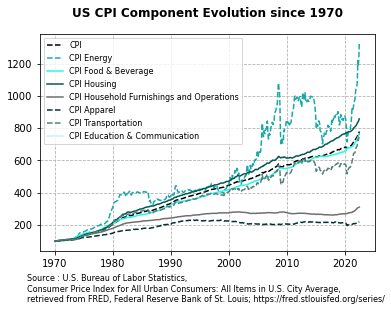

In [218]:
df_test = pd.DataFrame(pdr.get_data_fred(['CPIAUCSL','CPIENGSL','CPIFABSL','CPIHOSNS','CUSR0000SAH3','CPIAPPSL','CPITRNSL','CPIEDUSL'], start='1970-01-01', end = '2022-06-30'))


plt.plot(df_test.index, df_test['CPIAUCSL']/df_test['CPIAUCSL'].iloc[0] *100, '--', color ="black")
plt.plot(df_test.index, df_test['CPIENGSL']/df_test['CPIENGSL'].iloc[0] *100, '--', color ="#19A9A9")
plt.plot(df_test.index, df_test['CPIFABSL']/df_test['CPIFABSL'].iloc[0]*100,color ="#24F9E7")
plt.plot(df_test.index, df_test['CPIHOSNS']/df_test['CPIHOSNS'].iloc[0]*100,color ="#045851")

plt.plot(df_test.index, df_test['CUSR0000SAH3']/df_test['CUSR0000SAH3'].iloc[0]*100,color ="#6F6F6F")
plt.plot(df_test.index, df_test['CPIAPPSL']/df_test['CPIAPPSL'].iloc[0]*100,'--', color ="#043030")
#plt.plot(df_test.index, df_test['CPIMEDSL'],color ="#24F9E7")
plt.plot(df_test.index, df_test['CPITRNSL']/df_test['CPITRNSL'].iloc[0]*100,'--', color ="#547F7B")
plt.plot(df_test.index, df_test['CPIEDUSL']/df_test['CPIEDUSL'].iloc[0]*100,color ="#C3F7F2")

plt.grid(linestyle = 'dashed')
plt.legend(['CPI','CPI Energy','CPI Food & Beverage','CPI Housing','CPI Household Furnishings and Operations','CPI Apparel','CPI Transportation','CPI Education & Communication'], fontsize = 8, loc="upper left")#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("US CPI Component Evolution since 1970", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.15), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


# FIGURE 12 : US PCEPI EVOLUTION

Text(-80, -20, 'Source : U.S. Bureau of Economic Analysis, Personal Consumption Expenditures: Chain-type Price Index [PCEPI], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCEPI \nU.S. Bureau of Economic Analysis, Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) [PCEPILFE], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCEPILFE')

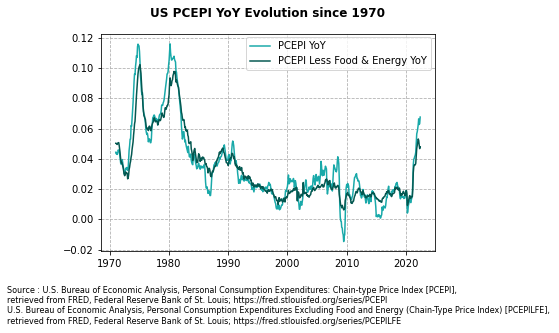

In [219]:
df_test = pd.DataFrame(pdr.get_data_fred(['CPIAUCSL','PCEPI','PCEPILFE'], start='1970-01-01', end = '2022-06-30')).pct_change(12)
plt.plot(df_test.index, df_test['PCEPI'],color ="#19A9A9")
plt.plot(df_test.index, df_test['PCEPILFE'],color ="#045851")
#plt.plot(df_test.index, df_test['CPIAUCSL'],color ="#6F6F6F")
plt.grid(linestyle ='dashed')
plt.legend(['PCEPI YoY','PCEPI Less Food & Energy YoY','CPI YoY'], loc="lower center", bbox_to_anchor=(0.71, 0.81))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("US PCEPI YoY Evolution since 1970", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Economic Analysis, Personal Consumption Expenditures: Chain-type Price Index [PCEPI], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCEPI \nU.S. Bureau of Economic Analysis, Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) [PCEPILFE], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCEPILFE', (-0.04,-0.25), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 13 : US PPI

Text(-80, -20, 'Source : U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PPIACO \nU.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Final Demand: Finished Goods Less Foods and Energy [WPSFD4131], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPSFD4131')

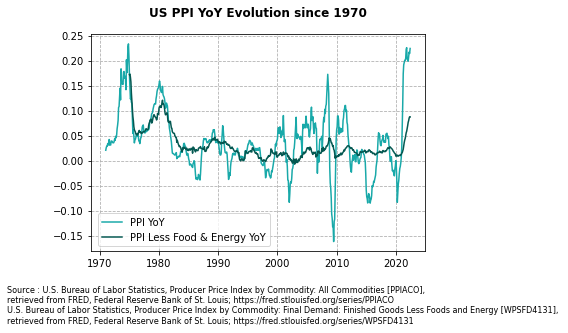

In [547]:
df_test = pd.DataFrame(pdr.get_data_fred(['PPIACO','WPSFD4131','PPIDSS'], start='1970-01-01', end = '2022-06-30')).pct_change(12)
df_test = df_test.rename(columns={'PPIACO':'CPI YoY'})

df_test['2'] = 0.02

plt.grid(linestyle ='dashed')
plt.plot(df_test.index, df_test['CPI YoY'],color ="#19A9A9")
plt.plot(df_test.index, df_test['WPSFD4131'],color ="#045851")
#plt.plot(df_test.index, df_test['2'], '--',color ="r")

plt.legend(['PPI YoY','PPI Less Food & Energy YoY'], loc="lower center", bbox_to_anchor=(0.28, 0))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("US PPI YoY Evolution since 1970", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: All Commodities [PPIACO], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PPIACO \nU.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Final Demand: Finished Goods Less Foods and Energy [WPSFD4131], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPSFD4131', (-0.01,-0.25), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 14 : FR + ALL CPI

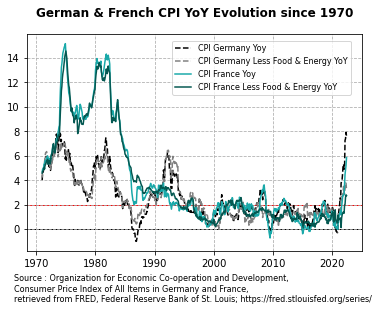

In [53]:
df_test = pd.DataFrame(pdr.get_data_fred(['DEUCPIALLMINMEI','DEUCPICORMINMEI','FRACPIALLMINMEI', 'FRACPICORMINMEI'], start='1970-01-01', end = '2022-06-30')).pct_change(12) * 100


plt.plot(df_test.index, df_test['DEUCPIALLMINMEI'], '--', color ="black")
plt.plot(df_test.index, df_test['DEUCPICORMINMEI'], '--', color ="grey")
plt.plot(df_test.index, df_test['FRACPIALLMINMEI'], color ="#19A9A9")
plt.plot(df_test.index, df_test['FRACPICORMINMEI'], color ="#045851")

plt.grid(which='both', linestyle = '--')
plt.legend(['CPI Germany Yoy','CPI Germany Less Food & Energy YoY','CPI France Yoy','CPI France Less Food & Energy YoY'], loc="lower center", bbox_to_anchor=(0.70, 0.7), fontsize=8)#, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("German & French CPI YoY Evolution since 1970", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Organization for Economic Co-operation and Development, \nConsumer Price Index of All Items in Germany and France, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.15), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c="black", linewidth=1, zorder=0)
plt.axhline(y=2, c="r", linewidth=1, zorder=0, linestyle = '-')

# FIGURE 15 : Euro Area CPI  YoY evolution

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(-80, -20, 'Source : Eurostat, Real Gross Domestic Product (Euro/ECU series) for Euro area (19 countries) [CLVMEURSCAB1GQEA19], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CLVMEURSCAB1GQEA19 \nEurostat, Harmonized Index of Consumer Prices: All Items for Euro area (19 countries) [CP0000EZ19M086NEST], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CP0000EZ19M086NEST \nOrganization for Economic Co-operation and Development, Consumer Price Index: Harmonized Prices: \nTotal All Items Less Food, Energy, Tobacco, and Alcohol for the Euro Area [CPHPLA01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPHPLA01EZM661N')

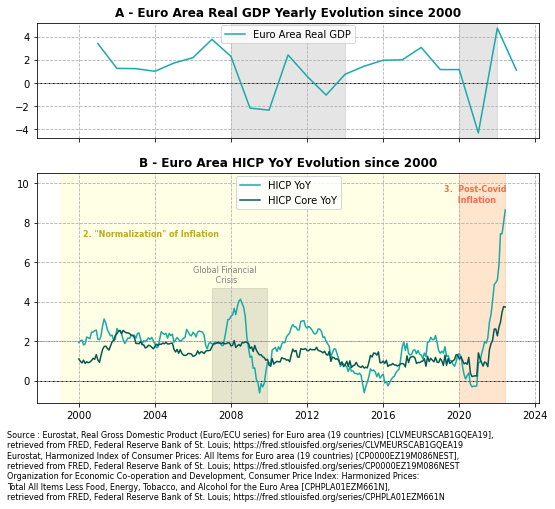

In [6]:
df_test2 = pd.DataFrame(pdr.get_data_fred(['CLVMEURSCAB1GQEA19'], start='1999-01-01', end = '2022-06-30')).resample('Y').last().pct_change() * 100
df_test = pd.DataFrame(pdr.get_data_fred(['CP0000EZ19M086NEST','CPHPLA01EZM661N'], start='1999-01-01', end = '2022-06-30'))

from datetime import datetime as dt
df_test2['xxx'] = np.nan
for i in range(len(df_test2.index)):
    if df_test2['CLVMEURSCAB1GQEA19'].iloc[i] < 0:
        df_test2['xxx'].iloc[i-1] = True
        df_test2['xxx'].iloc[i] = True
        try:
            df_test2['xxx'].iloc[i+1] = True
        except:
            x = 1
            
df_test['CP0000EZ19M086NEST'] = df_test['CP0000EZ19M086NEST'].pct_change(12) * 100
df_test['CPHPLA01EZM661N'] = df_test['CPHPLA01EZM661N'].pct_change(12) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,7), gridspec_kw={'height_ratios': [1, 2]})

ax1.plot(df_test2.index, df_test2['CLVMEURSCAB1GQEA19'], color='#19A9A9')
ax1.set_title("A - Euro Area Real GDP Yearly Evolution since 2000", fontweight="bold", x=0.5, y=1.)
ax1.axhline(y=0, c="black", linewidth=1, zorder=0)
ax1.fill_between(df_test2.index, 0, 1, where= df_test2['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.legend(['Euro Area Real GDP'], loc="lower center", bbox_to_anchor=(0.5, 0.78))#,fancybox=True, framealpha=0.)
#ax1.annotate('- Recession', (0.6,0.2), (-80,-20),color ='grey', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax1.grid(linestyle = 'dashed')

ax2.plot(df_test.index, df_test['CP0000EZ19M086NEST'], color='#19A9A9')
ax2.plot(df_test.index, df_test['CPHPLA01EZM661N'], color='#045851')

#ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax2.fill_between(df_test.index, 0, 10, where=df_test.index < '1985-12-31',
                color='grey', alpha=0.1, transform=ax2.get_xaxis_transform())

#ax.axhline(threshold, color='green', lw=2, alpha=0.7)
ax2.fill_between(df_test.index, 0, 10, where= df_test.index > '1985-12-31',
                color='yellow', alpha=0.1, transform=ax2.get_xaxis_transform())

ax2.fill_between(df_test.index, 0, 10, where= df_test.index > '2019-12-31',
                color='red', alpha=0.1, transform=ax2.get_xaxis_transform())
ax2.axhline(y=0, c="black", linewidth=1, zorder=0)
ax2.axhline(y=2, c="black", linewidth=0.5, zorder=0, linestyle = '--')
ax2.grid(linestyle = 'dashed')
df_test['xxx'] = np.nan
for i in range(len(df_test.index)):
    if df_test.index[i] > dt(2006,12,31) and df_test.index[i] < dt(2010, 1,1):
        df_test['xxx'].iloc[i] = True

ax2.fill_between(df_test.index, 0, 0.5, where= df_test['xxx'] == True, 
                 color='k', alpha=0.1, transform=ax2.get_xaxis_transform())

ax2.legend(['HICP YoY','HICP Core YoY'], loc="lower center", bbox_to_anchor=(0.5, 0.82))#,fancybox=True, framealpha=0.)
#plt.xlabel("Sectors",fontweight="bold")
ax2.set_title("B - Euro Area HICP YoY Evolution since 2000", fontweight="bold", x=0.5, y=1.)

ax2.annotate('2. "Normalization" of Inflation', (0.25,0.8), (-80,-20),color ='#BAAC1D', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('3.  Post-Covid\n     Inflation', (0.97,0.95), (-80,-20),color ='#F16F48', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('Global Financial\n         Crisis', (0.47,0.6), (-80,-20),color ='grey', fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax2.annotate('Source : Eurostat, Real Gross Domestic Product (Euro/ECU series) for Euro area (19 countries) [CLVMEURSCAB1GQEA19], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CLVMEURSCAB1GQEA19 \nEurostat, Harmonized Index of Consumer Prices: All Items for Euro area (19 countries) [CP0000EZ19M086NEST], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CP0000EZ19M086NEST \nOrganization for Economic Co-operation and Development, Consumer Price Index: Harmonized Prices: \nTotal All Items Less Food, Energy, Tobacco, and Alcohol for the Euro Area [CPHPLA01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPHPLA01EZM661N', (0.1,-0.34), (-80,-20), fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')

Text(-80, -20, 'Source : Eurostat, Harmonized Index of Consumer Prices: All Items for Euro area (19 countries) [CP0000EZ19M086NEST], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CP0000EZ19M086NEST \nOrganization for Economic Co-operation and Development, Consumer Price Index: Harmonized Prices: Total All Items Less Food, \nEnergy, Tobacco, and Alcohol for the Euro Area [CPHPLA01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPHPLA01EZM661N')

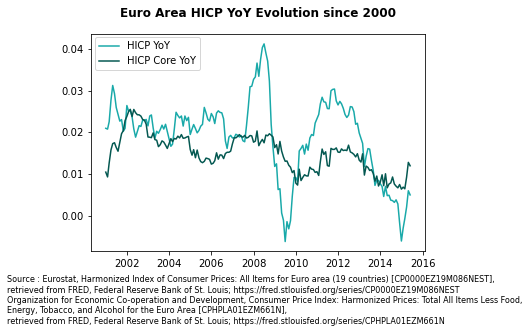

In [875]:
df_test = pd.DataFrame(pdr.get_data_fred(['CP0000EZ19M086NEST','CPHPLA01EZM661N'], start='2000-01-01', end = '2015-06-30')).pct_change(12)
df_test = df_test.rename(columns={'CP0000EZ19M086NEST':'CPI YoY'})

df_test['2'] = 0.02


plt.plot(df_test.index, df_test['CPI YoY'],color ="#19A9A9")
plt.plot(df_test.index, df_test['CPHPLA01EZM661N'],color ="#045851")


plt.legend(['HICP YoY','HICP Core YoY'], loc="lower center", bbox_to_anchor=(0.17, 0.81))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Euro Area HICP YoY Evolution since 2000", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Eurostat, Harmonized Index of Consumer Prices: All Items for Euro area (19 countries) [CP0000EZ19M086NEST], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CP0000EZ19M086NEST \nOrganization for Economic Co-operation and Development, Consumer Price Index: Harmonized Prices: Total All Items Less Food, \nEnergy, Tobacco, and Alcohol for the Euro Area [CPHPLA01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPHPLA01EZM661N', (-0.01,-0.25), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 16 : BREAK DOWN EURO AREA HICP

Text(-80, -20, 'Source : Eurostat, Harmonized Index of Consumer Prices,\nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/')

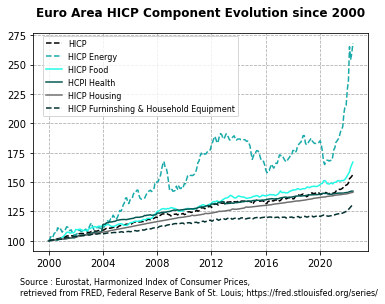

In [5]:
df_test = pd.DataFrame(pdr.get_data_fred(['CP0000EZ19M086NEST','ENRGY0EZ19M086NEST','CP0110EZ19M086NEST','CP0600EZ19M086NEST','CP0410EZ18M086NEST','CP0500EZ18M086NEST'], start='2000-01-01', end = '2022-06-30'))


plt.plot(df_test.index, df_test['CP0000EZ19M086NEST']/df_test['CP0000EZ19M086NEST'].iloc[0] *100, '--', color ="black")
plt.plot(df_test.index, df_test['ENRGY0EZ19M086NEST']/df_test['ENRGY0EZ19M086NEST'].iloc[0] *100, '--', color ="#19A9A9")
plt.plot(df_test.index, df_test['CP0110EZ19M086NEST']/df_test['CP0110EZ19M086NEST'].iloc[0]*100,color ="#24F9E7")
plt.plot(df_test.index, df_test['CP0600EZ19M086NEST']/df_test['CP0600EZ19M086NEST'].iloc[0]*100,color ="#045851")

plt.plot(df_test.index, df_test['CP0410EZ18M086NEST']/df_test['CP0410EZ18M086NEST'].iloc[0]*100,color ="#6F6F6F")
plt.plot(df_test.index, df_test['CP0500EZ18M086NEST']/df_test['CP0500EZ18M086NEST'].iloc[0]*100,'--', color ="#043030")
#plt.plot(df_test.index, df_test['CPIMEDSL'],color ="#24F9E7")

plt.grid(linestyle = 'dashed')
plt.legend(['HICP','HICP Energy','HICP Food','HCPI Health','HICP Housing','HICP Furninshing & Household Equipment','CPI Transportation','CPI Education & Communication'], loc="lower center", bbox_to_anchor=(0.32, 0.6), fontsize = 8)#, fontsize=8, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Euro Area HICP Component Evolution since 2000", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Eurostat, Harmonized Index of Consumer Prices,\nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.12), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


# FIGURE 17 : Euro Area PPI

Text(-80, -20, 'Source : Organization for Economic Co-operation and Development, \nProducer Prices Index: Economic Activities: Total Industrial Activities for the Euro Area [PIEATI01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PIEATI01EZM661N \nOrganization for Economic Co-operation and Development, \nProducer Prices Index: Economic Activities: Total Manufacturing for the Euro Area [PIEAMP01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PIEAMP01EZM661N')

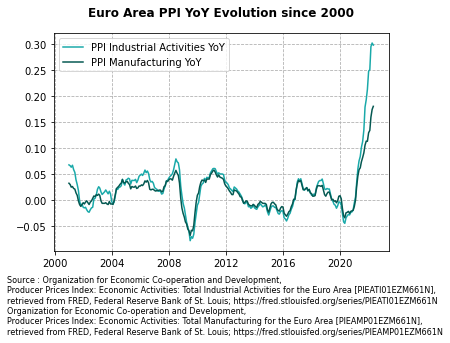

In [223]:
df_test = pd.DataFrame(pdr.get_data_fred(['PIEATI01EZM661N','PIEAMP01EZM661N'], start='2000-01-01', end = '2022-06-30')).pct_change(12)


#df_test['2'] = 0.02


plt.plot(df_test.index, df_test['PIEATI01EZM661N'],color ="#19A9A9")
plt.plot(df_test.index, df_test['PIEAMP01EZM661N'],color ="#045851")

plt.grid(linestyle = 'dashed')
plt.legend(['PPI Industrial Activities YoY','PPI Manufacturing YoY'], loc="upper left")# bbox_to_anchor=(0.28, 0.81))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Euro Area PPI YoY Evolution since 2000", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Organization for Economic Co-operation and Development, \nProducer Prices Index: Economic Activities: Total Industrial Activities for the Euro Area [PIEATI01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PIEATI01EZM661N \nOrganization for Economic Co-operation and Development, \nProducer Prices Index: Economic Activities: Total Manufacturing for the Euro Area [PIEAMP01EZM661N], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PIEAMP01EZM661N', (0.1,-0.3), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 18: PHILLIPS CURVE

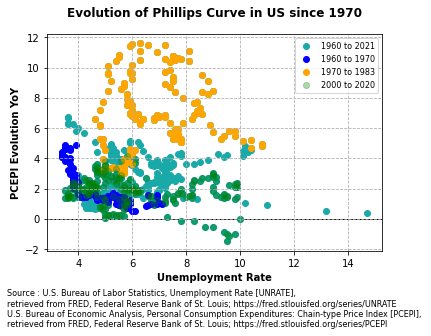

In [931]:
df_test = pd.DataFrame(pdr.get_data_fred(['PCEPI','UNRATE'], start='1970-01-01', end = '2022-06-30'))
df_test2 = pd.DataFrame(pdr.get_data_fred(['PCEPI','UNRATE'], start='1970-01-01', end = '1983-01-01'))
df_test3  = pd.DataFrame(pdr.get_data_fred(['PCEPI','UNRATE'], start='1960-01-01', end = '1970-01-01'))
df_test4  = pd.DataFrame(pdr.get_data_fred(['PCEPI','UNRATE'], start='2000-01-01', end = '2020-01-01'))

df_test['PCEPI'] = df_test['PCEPI'].pct_change(12) * 100
df_test2['PCEPI'] = df_test2['PCEPI'].pct_change(12) * 100
df_test3['PCEPI'] = df_test3['PCEPI'].pct_change(12) * 100
df_test4['PCEPI'] = df_test4['PCEPI'].pct_change(12) * 100

plt.scatter(df_test['UNRATE'], df_test['PCEPI'], color ="#19A9A9")
plt.scatter(df_test3['UNRATE'], df_test3['PCEPI'], color ="blue")
plt.scatter(df_test2['UNRATE'], df_test2['PCEPI'], color ="orange")

plt.scatter(df_test4['UNRATE'], df_test4['PCEPI'], color ="green", alpha=0.3)
#plt.plot(df_test.index, df_test['FRACPICORMINMEI'], color ="#045851")

plt.grid(which='both', linestyle = '--')
plt.legend(['1960 to 2021','1960 to 1970','1970 to 1983','2000 to 2020'], loc="lower center", bbox_to_anchor=(0.865, 0.71), fontsize=8)#, fancybox=True, framealpha=0.0)

plt.xlabel("Unemployment Rate",fontweight="bold")
plt.ylabel("PCEPI Evolution YoY",fontweight="bold")

plt.title("Evolution of Phillips Curve in US since 1970", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, Unemployment Rate [UNRATE], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/UNRATE \nU.S. Bureau of Economic Analysis, Personal Consumption Expenditures: Chain-type Price Index [PCEPI], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCEPI', (0.12,-0.22), (-80,-30), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c="black", linewidth=1, zorder=0)
#plt.axhline(y=2, c="r", linewidth=1, zorder=0, linestyle = '-')

# FIGURE 19 : BREADOWN US CPI AFTER COVID

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(-80, -20, 'Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/')

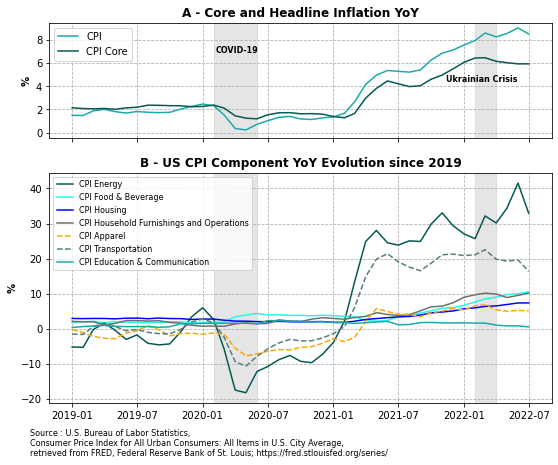

In [8]:
df_test = pd.DataFrame(pdr.get_data_fred(['CPIAUCSL','CPILFESL','CPIENGSL','CPIFABSL','CPIHOSNS','CUSR0000SAH3','CPIAPPSL','CPITRNSL','CPIEDUSL'], start='2018-01-01', end = '2022-07-31')).pct_change(12) * 100

from datetime import datetime as dt
df_test['xxx'] = np.nan
for i in range(len(df_test.index)):
    if (df_test.index[i] < dt(2020,6,1) and df_test.index[i] > dt(2020,2,1)) :
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1
for i in range(len(df_test.index)):
    if (df_test.index[i] < dt(2022,4,1) and df_test.index[i] > dt(2022,2,1)) :
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,7), gridspec_kw={'height_ratios': [1, 2]})
ax1.plot(df_test.index, df_test['CPIAUCSL'], '-', color ="#19A9A9")
ax1.plot(df_test.index, df_test['CPILFESL'], '-', color ="#045851")
ax1.set_title("A - Core and Headline Inflation YoY", fontweight="bold", x=0.5, y=1.)

ax1.fill_between(df_test.index, 0, 1, where= df_test['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.legend(['CPI', 'CPI Core'], loc="upper left")#,fancybox=True, framealpha=0.)       
ax1.grid(linestyle = 'dashed')           
ax1.annotate('COVID-19', (0.49,0.9), (-80,-20),color ='black', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax1.annotate('Ukrainian Crisis', (0.95,0.65), (-80,-20),color ='black', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax1.set_ylabel("%",fontweight="bold")

ax2.plot(df_test.index, df_test['CPIENGSL'], '-', color ="#045851")
ax2.plot(df_test.index, df_test['CPIFABSL'],color ="#24F9E7")
ax2.plot(df_test.index, df_test['CPIHOSNS'],color ="b")

ax2.plot(df_test.index, df_test['CUSR0000SAH3'],color ="#6F6F6F")
ax2.plot(df_test.index, df_test['CPIAPPSL'],'--', color ="orange")
#plt.plot(df_test.index, df_test['CPIMEDSL'],color ="#24F9E7")
ax2.plot(df_test.index, df_test['CPITRNSL'],'--', color ="#547F7B")
ax2.plot(df_test.index, df_test['CPIEDUSL'],color ="#19A9A9")
ax2.fill_between(df_test.index, 0, 1, where= df_test['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax2.get_xaxis_transform())
ax2.set_ylabel('%', fontweight = 'bold')
#ax2.xticks(rotation = 45)

ax2.grid(linestyle = 'dashed')
ax2.legend(['CPI Energy','CPI Food & Beverage','CPI Housing','CPI Household Furnishings and Operations','CPI Apparel','CPI Transportation','CPI Education & Communication'], fontsize = 8, loc='upper left')#, bbox_to_anchor=(1, 0.5))#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)

ax2.set_title("B - US CPI Component YoY Evolution since 2019", fontweight="bold", x=0.5, y=1.0)
plt.annotate('Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.12,-0.15), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


# FIGURE 20 : BREAKDOWN US HEADLINE CPI

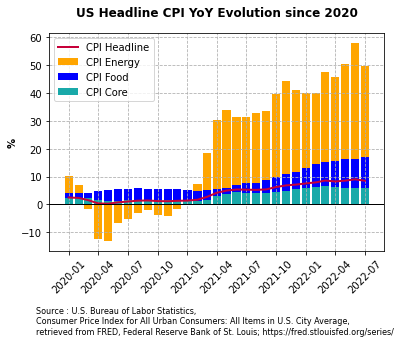

In [601]:
df_test = pd.DataFrame(pdr.get_data_fred(['CPIUFDSL','CPIENGSL','CPILFESL','CPIAUCSL'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100
#df_test['Total'] = df_test['CPIUFDSL'] + df_test['CPIENGSL'] + df_test['CPILFESL']


#plt.bar(df_test.index, df_test['CPIUFDSL'], '--', color ="#045851")
#plt.bar(df_test.index, df_test['CPIENGSL'],color ="#24F9E7")
#plt.bar(df_test.index, df_test['CORESTICKM159SFRBATL'],color ="#045851")



width = 25

# plot bars in stack manner
plt.plot(df_test.index, df_test['CPIAUCSL'] , '-', linewidth = 2, color ="#C70039")
plt.bar(df_test.index, df_test['CPIENGSL'] + df_test['CPIUFDSL'] + df_test['CPILFESL'], width = width,  color='orange')

plt.bar(df_test.index, df_test['CPIUFDSL'] + df_test['CPILFESL'], width = width, color='blue')
plt.bar(df_test.index, df_test['CPILFESL'], width = width,  color='#19A9A9')

plt.ylabel('%', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['CPI Headline','CPI Energy','CPI Food','CPI Core'], fontsize = 10, loc='upper left')#, bbox_to_anchor=(1, 0.5))#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("US Headline CPI YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.3), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 21 : CORE GOODS VS CORE SERVICES

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


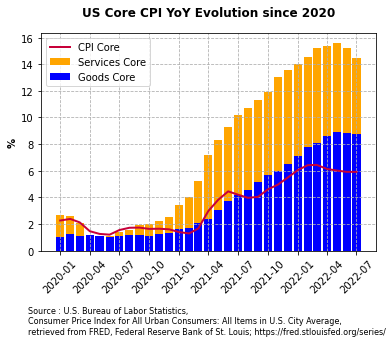

In [628]:
df_test = pd.DataFrame(pdr.get_data_fred(['WPSFD4131','WPSFD49116','CPILFESL'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100


#plt.bar(df_test.index, df_test['CPIUFDSL'], '--', color ="#045851")
#plt.bar(df_test.index, df_test['CPIENGSL'],color ="#24F9E7")
#plt.bar(df_test.index, df_test['CORESTICKM159SFRBATL'],color ="#045851")

from datetime import datetime as dt
df_test['xxx'] = np.nan
for i in range(len(df_test.index)):
    if df_test.index[i] < dt(2022,4,1) and df_test.index[i] > dt(2022,2,1) :
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1


width = 25

# plot bars in stack manner
plt.plot(df_test.index, df_test['CPILFESL'] , '-', linewidth = 2, color ="#C70039")
plt.ylabel('%' , fontweight = 'bold')
plt.bar(df_test.index, df_test['WPSFD49116'] + df_test['WPSFD4131'], width = width,  color='orange')
plt.bar(df_test.index, df_test['WPSFD4131'], width = width, color='blue')
#plt.fill_between(df_test.index, 0, 17, where= df_test['xxx'] ==True, 
#                 color='grey', alpha=0.5)#, transform=plt.get_xaxis_transform())
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['CPI Core','Services Core','Goods Core'], loc='upper left')#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("US Core CPI YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.3), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 22 : BREAKDOWN CORE GOODS

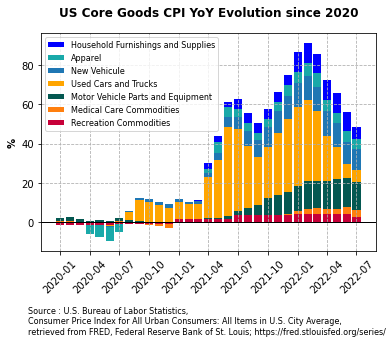

In [645]:
df_test = pd.DataFrame(pdr.get_data_fred(['CUUS0000SAH31','CPIAPPSL','CUUR0000SETA01','CUSR0000SETA02','CUUR0000SETC','CUSR0000SAM1','CUUS0000SARC','CPIAUCSL','CPILFESL'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100

width = 25

# plot bars in stack manner
#plt.plot(df_test.index, df_test['CPILFESL'] , '-', linewidth = 2, color ="#C70039")

plt.bar(df_test.index, df_test['CUUS0000SAH31'] + df_test['CPIAPPSL'] + df_test['CUUR0000SETA01'] + df_test['CUSR0000SETA02'] + df_test['CUUR0000SETC'] + df_test['CUSR0000SAM1'] + df_test['CUUS0000SARC']  , width = width, color = 'blue')
plt.bar(df_test.index, df_test['CPIAPPSL'] + df_test['CUUR0000SETA01'] + df_test['CUSR0000SETA02'] + df_test['CUUR0000SETC'] + df_test['CUSR0000SAM1'] + df_test['CUUS0000SARC']  , width = width, color = '#19A9A9')
plt.bar(df_test.index, df_test['CUUR0000SETA01'] + df_test['CUSR0000SETA02'] + df_test['CUUR0000SETC'] + df_test['CUSR0000SAM1'] + df_test['CUUS0000SARC']  , width = width)
plt.bar(df_test.index, df_test['CUSR0000SETA02'] + df_test['CUUR0000SETC'] + df_test['CUSR0000SAM1'] + df_test['CUUS0000SARC']  , width = width, color='orange')
plt.bar(df_test.index, df_test['CUUR0000SETC'] + df_test['CUSR0000SAM1'] + df_test['CUUS0000SARC']  , width = width, color = '#045851')
plt.bar(df_test.index, df_test['CUSR0000SAM1'] + df_test['CUUS0000SARC'], width = width)
plt.bar(df_test.index, df_test['CUUS0000SARC'], width = width, color ="#C70039")

#plt.fill_between(df_test.index, 0, 17, where= df_test['xxx'] ==True, 
#                 color='grey', alpha=0.5)#, transform=plt.get_xaxis_transform())
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['Household Furnishings and Supplies','Apparel','New Vehicule','Used Cars and Trucks','Motor Vehicle Parts and Equipment ','Medical Care Commodities','Recreation Commodities' ], fontsize =8, loc='upper left')#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
plt.ylabel("%",fontweight="bold")
plt.title("US Core Goods CPI YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.3), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 23 : CORE SERVICES BREAKDOWN

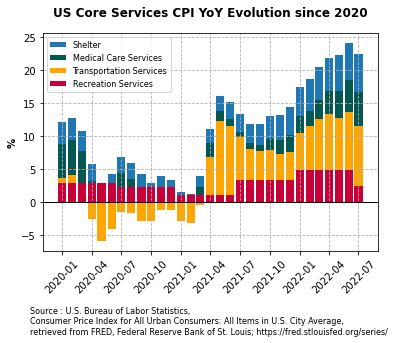

In [608]:

df_test = pd.DataFrame(pdr.get_data_fred(['CUSR0000SAH1','CUSR0000SAM2','CUUR0000SAS4','CUUS0000SARS'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100

width = 25

# plot bars in stack manner
#plt.plot(df_test.index, df_test['CPILFESL'] , '-', linewidth = 2, color ="#C70039")

plt.bar(df_test.index, df_test['CUSR0000SAH1'] + df_test['CUSR0000SAM2'] + df_test['CUUR0000SAS4'] + df_test['CUUS0000SARS']  , width = width)
plt.bar(df_test.index, df_test['CUSR0000SAM2'] + df_test['CUUR0000SAS4'] + df_test['CUUS0000SARS'] , width = width, color = '#045851')
plt.bar(df_test.index, df_test['CUUR0000SAS4'] + df_test['CUUS0000SARS'] , width = width, color='orange')
plt.bar(df_test.index, df_test['CUUS0000SARS'], width = width, color ="#C70039")

#plt.fill_between(df_test.index, 0, 17, where= df_test['xxx'] ==True, 
#                 color='grey', alpha=0.5)#, transform=plt.get_xaxis_transform())
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['Shelter','Medical Care Services','Transportation Services','Recreation Services'], fontsize =8, loc='upper left')#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
plt.ylabel("%",fontweight="bold")
plt.title("US Core Services CPI YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Bureau of Labor Statistics, \nConsumer Price Index for All Urban Consumers: All Items in U.S. City Average, \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/', (0.2,-0.3), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 24 : HICP Analysis

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(-80, -20, 'Source : Eurostat')

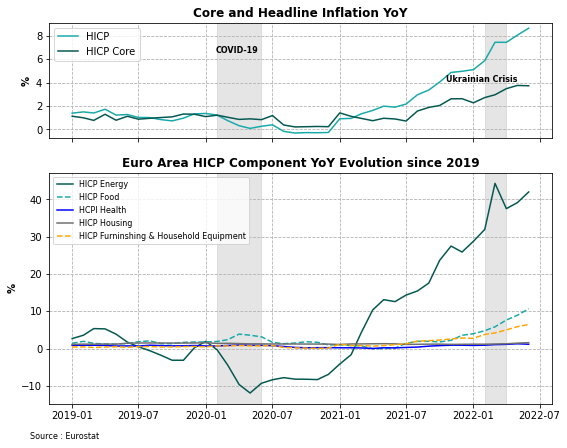

In [642]:
df_test = pd.DataFrame(pdr.get_data_fred(['CP0000EZ19M086NEST','CPHPLA01EZM661N','ENRGY0EZ19M086NEST','CP0110EZ19M086NEST','CP0600EZ19M086NEST','CP0410EZ18M086NEST','CP0500EZ18M086NEST'], start='2018-01-01', end = '2022-07-31')).pct_change(12) * 100

from datetime import datetime as dt
df_test['xxx'] = np.nan
for i in range(len(df_test.index)):
    if (df_test.index[i] < dt(2020,6,1) and df_test.index[i] > dt(2020,2,1)) :
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1
for i in range(len(df_test.index)):
    if (df_test.index[i] < dt(2022,4,1) and df_test.index[i] > dt(2022,2,1)) :
        df_test['xxx'].iloc[i-1] = True
        df_test['xxx'].iloc[i] = True
        try:
            df_test['xxx'].iloc[i+1] = True
        except:
            x = 1

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9,7), gridspec_kw={'height_ratios': [1, 2]})
ax1.plot(df_test.index, df_test['CP0000EZ19M086NEST'], '-', color ="#19A9A9")
ax1.plot(df_test.index, df_test['CPHPLA01EZM661N'], '-', color ="#045851")
ax1.set_title("Core and Headline Inflation YoY", fontweight="bold", x=0.5, y=1.)

ax1.fill_between(df_test.index, 0, 1, where= df_test['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.legend(['HICP', 'HICP Core'], loc="upper left")#,fancybox=True, framealpha=0.)       
ax1.grid(linestyle = 'dashed')           
ax1.annotate('COVID-19', (0.49,0.9), (-80,-20),color ='black', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax1.annotate('Ukrainian Crisis', (0.95,0.65), (-80,-20),color ='black', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')
ax1.set_ylabel("%",fontweight="bold")

ax2.plot(df_test.index, df_test['ENRGY0EZ19M086NEST'], '-', color ="#045851")
ax2.plot(df_test.index, df_test['CP0110EZ19M086NEST'],'--',color ="#19A9A9")
ax2.plot(df_test.index, df_test['CP0600EZ19M086NEST'],color ="b")

ax2.plot(df_test.index, df_test['CP0410EZ18M086NEST'],color ="#6F6F6F")
ax2.plot(df_test.index, df_test['CP0500EZ18M086NEST'],'--', color ="orange")

ax2.fill_between(df_test.index, 0, 1, where= df_test['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax2.get_xaxis_transform())
ax2.set_ylabel('%', fontweight = 'bold')
#ax2.xticks(rotation = 45)

ax2.grid(linestyle = 'dashed')
ax2.legend(['HICP Energy','HICP Food','HCPI Health','HICP Housing','HICP Furninshing & Household Equipment'], fontsize = 8, loc='upper left')#, bbox_to_anchor=(1, 0.5))#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)

ax2.set_title("Euro Area HICP Component YoY Evolution since 2019", fontweight="bold", x=0.5, y=1.0)
plt.annotate('Source : Eurostat', (0.12,-0.075), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


# FIGURE 25 : headline inflation deocmposition

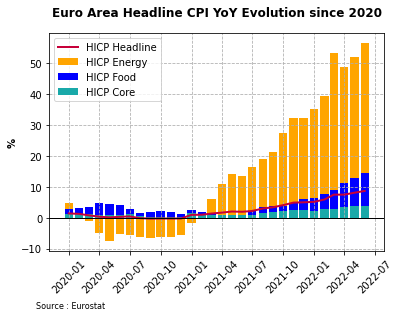

In [638]:
df_test = pd.DataFrame(pdr.get_data_fred(['CP0110EZ19M086NEST','ENRGY0EZ19M086NEST','CPHPLA01EZM661N','CP0000EZ19M086NEST'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100
#df_test['Total'] = df_test['CPIUFDSL'] + df_test['CPIENGSL'] + df_test['CPILFESL']


#plt.bar(df_test.index, df_test['CPIUFDSL'], '--', color ="#045851")
#plt.bar(df_test.index, df_test['CPIENGSL'],color ="#24F9E7")
#plt.bar(df_test.index, df_test['CORESTICKM159SFRBATL'],color ="#045851")



width = 25

# plot bars in stack manner
plt.plot(df_test.index, df_test['CP0000EZ19M086NEST'] , '-', linewidth = 2, color ="#C70039")
plt.bar(df_test.index, df_test['ENRGY0EZ19M086NEST'] + df_test['CP0110EZ19M086NEST'] + df_test['CPHPLA01EZM661N'], width = width,  color='orange')

plt.bar(df_test.index, df_test['CP0110EZ19M086NEST'] + df_test['CPHPLA01EZM661N'], width = width, color='blue')
plt.bar(df_test.index, df_test['CPHPLA01EZM661N'], width = width,  color='#19A9A9')

plt.ylabel('%', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['HICP Headline','HICP Energy','HICP Food','HICP Core'], fontsize = 10, loc='upper left')#, bbox_to_anchor=(1, 0.5))#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Euro Area Headline CPI YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Eurostat', (0.2,-0.18), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 26 : Good and COre Service EURO 

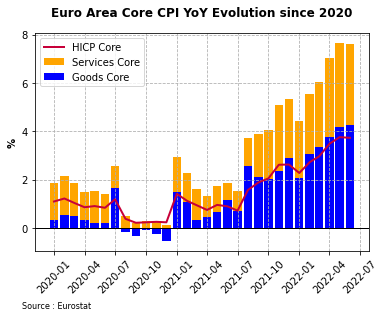

In [648]:
df_test = pd.DataFrame(pdr.get_data_fred(['CPHPLA01EZM661N','IGDSXEEZ18M086NEST','CPHPSE01EZM661N'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100


#plt.bar(df_test.index, df_test['CPIUFDSL'], '--', color ="#045851")
#plt.bar(df_test.index, df_test['CPIENGSL'],color ="#24F9E7")
#plt.bar(df_test.index, df_test['CORESTICKM159SFRBATL'],color ="#045851")


width = 25

# plot bars in stack manner
plt.plot(df_test.index, df_test['CPHPLA01EZM661N'] , '-', linewidth = 2, color ="#C70039")
plt.ylabel('%' , fontweight = 'bold')
plt.bar(df_test.index, df_test['CPHPSE01EZM661N'] + df_test['IGDSXEEZ18M086NEST'], width = width,  color='orange')
plt.bar(df_test.index, df_test['IGDSXEEZ18M086NEST'], width = width, color='blue')
#plt.fill_between(df_test.index, 0, 17, where= df_test['xxx'] ==True, 
#                 color='grey', alpha=0.5)#, transform=plt.get_xaxis_transform())
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['HICP Core','Services Core','Goods Core'], loc='upper left')#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Euro Area Core CPI YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Eurostat', (0.2,-0.18), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 27 : goods and services decomposition

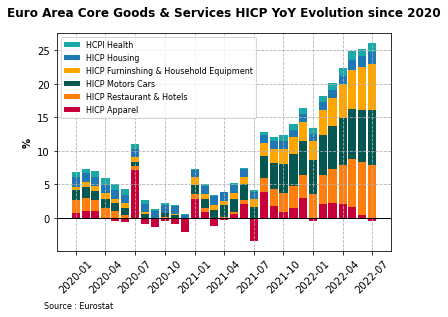

In [9]:
df_test = pd.DataFrame(pdr.get_data_fred(['CP0600EZ19M086NEST','CP0410EZ18M086NEST','CP0500EZ18M086NEST','CP0711EZ18M086NEST','CP1100EZ19M086NEST','CP0310EZ19M086NEST'], start='2019-01-01', end = '2022-07-31')).pct_change(12)*100

width = 25

# plot bars in stack manner
#plt.plot(df_test.index, df_test['CPILFESL'] , '-', linewidth = 2, color ="#C70039")


plt.bar(df_test.index, df_test['CP0310EZ19M086NEST'] + df_test['CP1100EZ19M086NEST'] + df_test['CP0711EZ18M086NEST'] + df_test['CP0500EZ18M086NEST'] + df_test['CP0410EZ18M086NEST'] + df_test['CP0600EZ19M086NEST']  , width = width, color = '#19A9A9')
plt.bar(df_test.index, df_test['CP0310EZ19M086NEST'] + df_test['CP1100EZ19M086NEST'] + df_test['CP0711EZ18M086NEST'] + df_test['CP0500EZ18M086NEST'] + df_test['CP0410EZ18M086NEST']  , width = width)
plt.bar(df_test.index, df_test['CP0310EZ19M086NEST'] + df_test['CP1100EZ19M086NEST'] + df_test['CP0711EZ18M086NEST'] + df_test['CP0500EZ18M086NEST']  , width = width, color='orange')
plt.bar(df_test.index, df_test['CP0310EZ19M086NEST'] + df_test['CP1100EZ19M086NEST'] + df_test['CP0711EZ18M086NEST']  , width = width, color = '#045851')
plt.bar(df_test.index, df_test['CP0310EZ19M086NEST'] + df_test['CP1100EZ19M086NEST'], width = width)
plt.bar(df_test.index, df_test['CP0310EZ19M086NEST'], width = width, color ="#C70039")

#plt.fill_between(df_test.index, 0, 17, where= df_test['xxx'] ==True, 
#                 color='grey', alpha=0.5)#, transform=plt.get_xaxis_transform())
plt.xticks(rotation = 45)
plt.grid(linestyle = 'dashed')
plt.legend(['HCPI Health','HICP Housing','HICP Furninshing & Household Equipment', 'HICP Motors Cars','HICP Restaurant & Hotels','HICP Apparel'], fontsize =8, loc='upper left')#, bbox_to_anchor=(0.32, 0.47), fontsize=8, fancybox=True, framealpha=0.0)
plt.ylabel("%",fontweight="bold")
plt.title("Euro Area Core Goods & Services HICP YoY Evolution since 2020", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Eurostat', (0.2,-0.18), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')
plt.axhline(y=0, c='black',linewidth = 1)


# FIGURE 28 : CAUSES OF INFLATION / SUPPLY CHAIN ISSUES 

C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\ssatn\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(-80, -20, 'Source : Bloomberg \nFederal Reserve Bank of New York \nFederal Reserve Bank of Atlanta ')

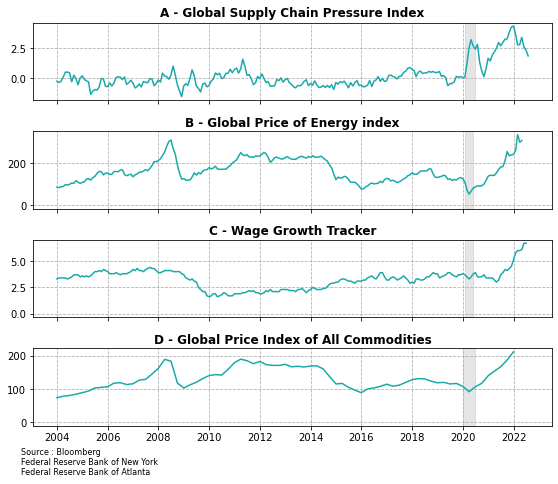

In [1052]:
df_test2 = pd.DataFrame(pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\gscpi_data.xls", sheet_name ='GSCPI Monthly Data'))#.resample('M').last()#.pct_change() * 100
df_test2.index = df_test2['Date']
df_test2.resample('Q').last()

df_test = pd.DataFrame(pdr.get_data_fred(['PNRGINDEXM'], start='1998-01-31', end = '2022-07-30'))
df_test1 = pd.DataFrame(pdr.get_data_fred(['PALLFNFINDEXQ'], start='1998-01-31', end = '2022-07-30'))
df_test3 = pd.DataFrame(pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\wage-growth-data.xlsx", sheet_name ='data_overall'))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(9,7))#, gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

df_test2 = df_test2.loc[df_test2.index > dt(2003,12,1)]

ax1.plot(df_test2.index, df_test2['GSCPI'], color='#19A9A9')
ax1.set_title("A - Global Supply Chain Pressure Index", fontweight="bold", x=0.5, y=1.)
ax1.fill_between(df_test2.index, 0, 1, where= df_test2['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.grid(linestyle = 'dashed')
#ax1.axhline(y=0, c="black", linewidth=1, zorder=0)

#ax1.legend(['Crude oil'], loc="lower center", bbox_to_anchor=(0.5, 0.78),fancybox=True, framealpha=0.)
#ax1.annotate('- Recession', (0.6,0.2), (-80,-20),color ='grey', fontweight="bold", fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')


df_test = df_test.loc[df_test.index > dt(2003,12,1)]
ax2.plot(df_test.index, df_test['PNRGINDEXM'], color='#19A9A9')
#ax2.legend(['Fed'], loc="lower center", bbox_to_anchor=(0.5, 0.82),fancybox=True, framealpha=0.)
ax2.set_title("B - Global Price of Energy index", fontweight="bold", x=0.5, y=0.98)

from datetime import datetime as dt
df_test['xxx'] = np.nan
for i in range(len(df_test.index)):
    if df_test.index[i] < dt(2020,6,30) and df_test.index[i] > dt(2020,1,30):
        df_test['xxx'].iloc[i] = True


ax2.fill_between(df_test.index, 0, 1, where= df_test['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax2.get_xaxis_transform())
ax2.grid(linestyle = 'dashed')

df_test3 = df_test3.loc[df_test3['Date'] > dt(2003,12,1)]
ax3.plot(df_test3['Date'], df_test3['Unweighted Overall'], color='#19A9A9')
#ax3.legend(['Unweighted Overall'], loc="lower center", bbox_to_anchor=(0.5, 0.82),fancybox=True, framealpha=0.)
ax3.set_title("C - Wage Growth Tracker", fontweight="bold", x=0.5, y=0.99)
ax3.fill_between(df_test3['Date'], 0, 1, where= df_test3['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax3.get_xaxis_transform())
ax3.grid(linestyle = 'dashed')

from datetime import datetime as dt
df_test1['xxx'] = np.nan
for i in range(len(df_test1.index)):
    if df_test1.index[i] < dt(2020,7,30) and df_test1.index[i] > dt(2019,12,30):
        df_test1['xxx'].iloc[i] = True
df_test1 = df_test1.loc[df_test1.index > dt(2003,12,1)]
ax4.plot(df_test1.index, df_test1['PALLFNFINDEXQ'], color='#19A9A9')
#ax3.legend(['Unweighted Overall'], loc="lower center", bbox_to_anchor=(0.5, 0.82),fancybox=True, framealpha=0.)
ax4.set_title("D - Global Price Index of All Commodities", fontweight="bold", x=0.5, y=0.99)
ax4.fill_between(df_test1.index, 0, 1, where= df_test1['xxx'] ==True, 
                 color='grey', alpha=0.2, transform=ax4.get_xaxis_transform())
ax4.grid(linestyle = 'dashed')

ax4.annotate('Source : Bloomberg \nFederal Reserve Bank of New York \nFederal Reserve Bank of Atlanta ', (0.13,-0.4), (-80,-20), fontsize=8,  xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 29 : ECB + FED BS

Text(-80, -20, 'Source : Board of Governors of the Federal Reserve System (US), Assets: Total Assets\nEuropean Central Bank')

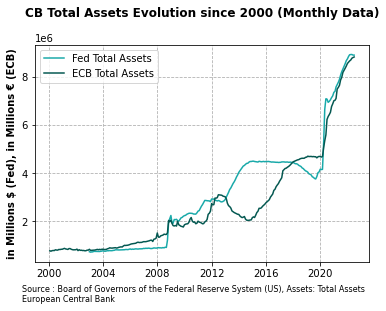

In [707]:
df_test = pd.DataFrame(pdr.get_data_fred(['WALCL','ECBASSETSW'], start='2000-01-01', end = '2022-06-30')).resample('M').last()
plt.plot(df_test.index, df_test['WALCL'],color ="#19A9A9")
plt.plot(df_test.index, df_test['ECBASSETSW'],color ="#045851")
#plt.plot(df_test.index, df_test['CPIAUCSL'],color ="#6F6F6F")
plt.grid(linestyle ='dashed')
plt.legend(['Fed Total Assets','ECB Total Assets'], loc="upper left")#, bbox_to_anchor=(0.71, 0.81))
plt.ylabel("in Millions $ (Fed), in Millions € (ECB)",fontweight="bold")
plt.title("CB Total Assets Evolution since 2000 (Monthly Data)", fontweight="bold", x=0.5, y=1.1)
plt.annotate('Source : Board of Governors of the Federal Reserve System (US), Assets: Total Assets\nEuropean Central Bank', (0.2,-0.1), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 30 : VELOCITY OF M2 

Text(-80, -20, 'Source : Federal Reserve Bank of St. Louis, Velocity of M2 Money Stock [M2V], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/M2V')

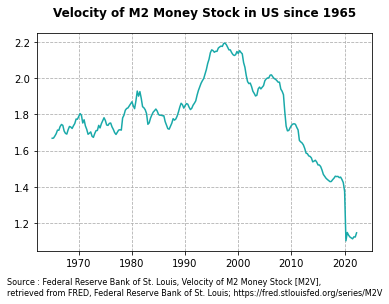

In [930]:
df_test = pd.DataFrame(pdr.get_data_fred(['M2V'], start='1965-01-01', end = '2022-06-30'))


#df_test['2'] = 0.02


plt.plot(df_test.index, df_test['M2V'],color ="#19A9A9")

plt.grid(linestyle = 'dashed')
#plt.legend(['PPI Industrial Activities YoY','PPI Manufacturing YoY'], loc="upper left")# bbox_to_anchor=(0.28, 0.81))
#plt.xlabel("Sectors",fontweight="bold")
plt.title("Velocity of M2 Money Stock in US since 1965", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : Federal Reserve Bank of St. Louis, Velocity of M2 Money Stock [M2V], \nretrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/M2V', (0.15,-0.12), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

# FIGURE 31 : Index and Real Estate bubble

ValueError: x and y must have same first dimension, but have shapes (50,) and (49,)

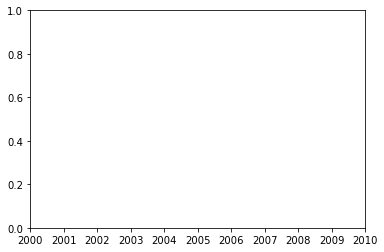

In [12]:
df = pd.DataFrame(pdr.get_data_yahoo(['^GSPC','^STOXX'], start = '2010-01-01', end = '2022-06-30')['Adj Close']).resample('Q').last()
df_test = pd.DataFrame(pdr.get_data_fred(['USSTHPI','QXMN628BIS'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()


plt.plot(df.index, df['^GSPC'][:-1]/df['^GSPC'][:-1].iloc[0] *100, color ="#19A9A9")
plt.plot(df_test.index, df_test['USSTHPI']/df_test['USSTHPI'].iloc[0]*100, color ="#045851")
plt.plot(df.index, df['^STOXX'][:-1]/df['^STOXX'].iloc[0]*100, color ="#19A9A9", linestyle= '--')
plt.plot(df_test.index, df_test['QXMN628BIS']/df_test['QXMN628BIS'].iloc[0]*100,color ="#045851",  linestyle= '--')


#plt.plot(df_test.index, df_test['CPIAUCSL'],color ="#6F6F6F")
plt.grid(linestyle ='dashed')
plt.legend(['S&P 500 Index', 'All-Transactions House Price Index for the US', 'STOXX 600 Index', 'Residential Property Prices for Euro area'], loc="upper left")#, bbox_to_anchor=(0.71, 0.81))
#plt.ylabel(,fontweight="bold")
plt.title("Stock Index and Real Estate", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Federal Housing Finance Agency \nBank for International Settlements\nRefinitiv', (0.2,-0.16), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


# FIGURE 32 : UNEMPLOYMENT RATE + CAPACITY Rate

Text(-80, -20, 'Source : U.S. Bureau of Labor Statistics \nBoard of Governors of the Federal Reserve System (US), \nOrganization for Economic Co-operation and Development')

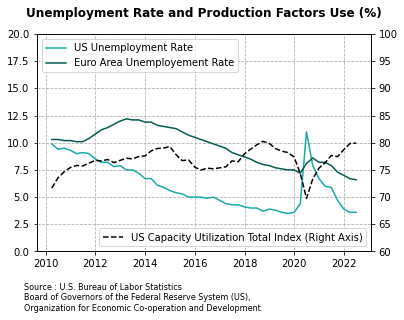

In [963]:
df_test = pd.DataFrame(pdr.get_data_fred(['UNRATE','LRHUTTTTEZM156S','TCU'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df_test.index, df_test['UNRATE'], color ="#19A9A9")
ax1.plot(df_test.index, df_test['LRHUTTTTEZM156S'], color ="#045851")
ax2.plot(df_test.index, df_test['TCU'], color ="k", linestyle= '--')
ax1.set_ylim(bottom = 0, top = 20)
ax2.set_ylim(bottom = 60, top =100)
#plt.plot(df_test.index, df_test['CPIAUCSL'],color ="#6F6F6F")
ax1.grid(linestyle ='dashed')
ax1.legend(['US Unemployment Rate', 'Euro Area Unemployement Rate', 'US Capacity Utilization Total Index'], loc="upper left")#, bbox_to_anchor=(0.71, 0.81))
ax2.legend(['US Capacity Utilization Total Index (Right Axis)'], loc="lower right")
#plt.ylabel(,fontweight="bold")
ax1.set_title("Unemployment Rate and Production Factors Use (%)", fontweight="bold", x=0.5, y=1.05)
ax1.annotate('Source : U.S. Bureau of Labor Statistics \nBoard of Governors of the Federal Reserve System (US), \nOrganization for Economic Co-operation and Development', (0.2,-0.19), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


# FIGURE 33 :  LINEAR REGRESSION US DATA

Text(-80, -20, 'Source : Refinitiv \nU.S. Federal Housing Finance Agency \nU.S. Bureau of Labor Statistics \nU.S. Department of the Treasury')

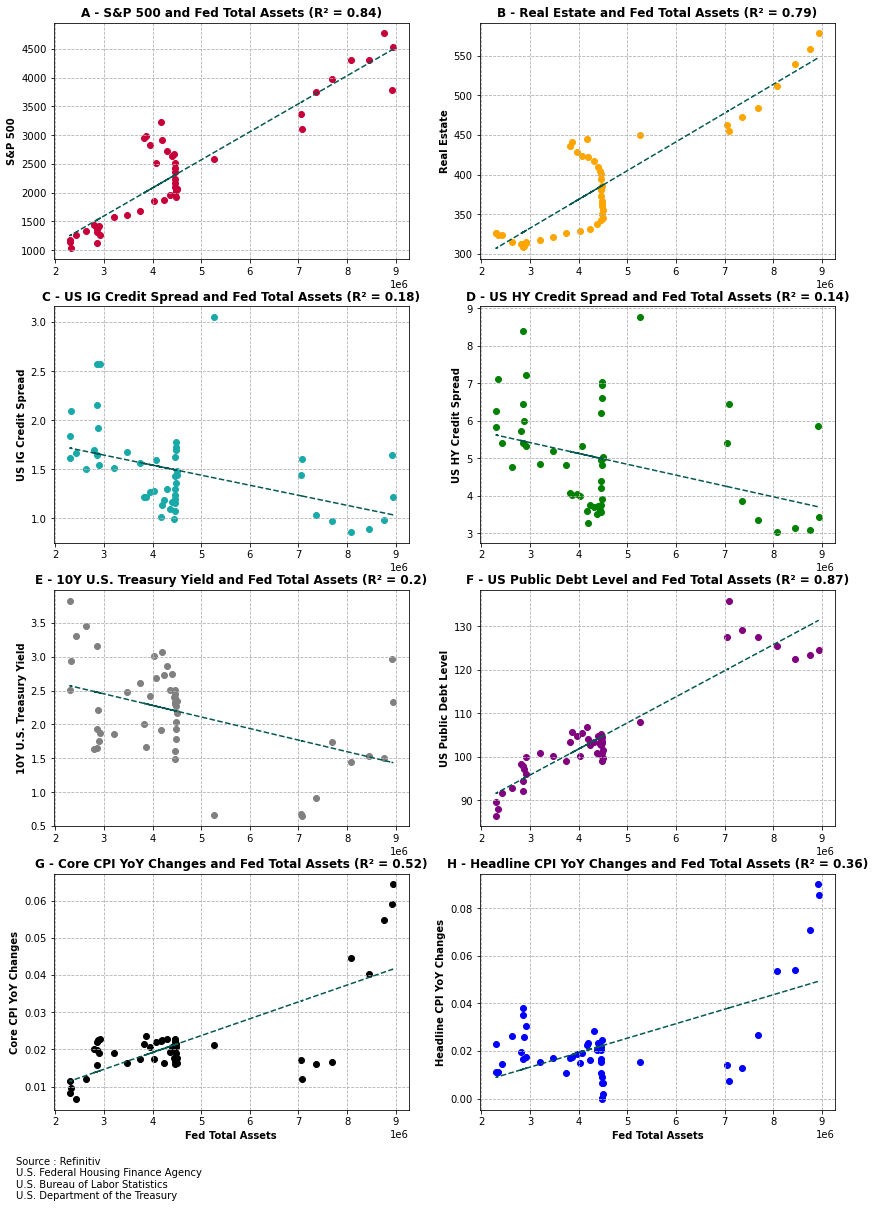

In [1036]:
df_test = pd.DataFrame(pdr.get_data_fred(['WALCL'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()
df = pd.DataFrame(pdr.get_data_yahoo('^GSPC', start = '2010-01-01', end = '2022-06-30')['Adj Close']).resample('Q').last()

df_test2 = pd.DataFrame(pdr.get_data_fred(['USSTHPI'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()
df_test3 = pd.DataFrame(pdr.get_data_fred(['BAMLC0A0CM'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()
df_test4 = pd.DataFrame(pdr.get_data_fred(['BAMLH0A0HYM2'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()

df_test5 = pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\Data Satnam.xlsx",sheet_name = '10Y')
df_test5 = df_test5.set_index('Date')
df_test5 = df_test5.resample('Q').last()

df_test6 = pd.DataFrame(pdr.get_data_fred(['CPILFESL'], start='2009-01-01', end = '2022-06-30')).resample('Q').last().pct_change(4)
df_test7 = pd.DataFrame(pdr.get_data_fred(['GFDEGDQ188S'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()
df_test8 = pd.DataFrame(pdr.get_data_fred(['CPIAUCSL'], start='2009-01-01', end = '2022-06-30')).resample('Q').last().pct_change(4)

from numpy.polynomial.polynomial import polyfit

fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8] ) = plt.subplots(4,2, figsize=(14,20), gridspec_kw={'height_ratios': [4, 4, 4, 4]})

ax1.scatter(df_test['WALCL'], df['Adj Close'], color = '#C70039')
OLS = np.polyfit(df_test['WALCL'].astype(float), df['Adj Close'].astype(float), 1)
b, m = polyfit(df_test['WALCL'], df['Adj Close'], 1)
ax1.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')

ax2.scatter(df_test['WALCL'][:-1], df_test2['USSTHPI'], color = 'orange')
OLS = np.polyfit(df_test['WALCL'][:-1].astype(float), df_test2['USSTHPI'].astype(float), 1)
b, m = polyfit(df_test['WALCL'][:-1], df_test2['USSTHPI'], 1)
ax2.plot(df_test['WALCL'][:-1], b + m * df_test['WALCL'][:-1], '--', color = '#045851')

ax3.scatter(df_test['WALCL'], df_test3['BAMLC0A0CM'], color = '#19A9A9')
OLS = np.polyfit(df_test['WALCL'].astype(float), df_test3['BAMLC0A0CM'].astype(float), 1)
b, m = polyfit(df_test['WALCL'], df_test3['BAMLC0A0CM'], 1)
ax3.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')

ax4.scatter(df_test['WALCL'], df_test4['BAMLH0A0HYM2'], color = 'green')
OLS = np.polyfit(df_test['WALCL'].astype(float), df_test4['BAMLH0A0HYM2'].astype(float), 1)
b, m = polyfit(df_test['WALCL'], df_test4['BAMLH0A0HYM2'], 1)
ax4.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')

ax5.scatter(df_test['WALCL'], df_test5['10Y US'][:-1], color = 'grey')
OLS = np.polyfit(df_test['WALCL'], df_test5['10Y US'][:-1], 1)
b, m = polyfit(df_test['WALCL'], df_test5['10Y US'][:-1], 1)
ax5.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')

ax6.scatter(df_test['WALCL'][:-1], df_test7['GFDEGDQ188S'], color = 'purple')
OLS = np.polyfit(df_test['WALCL'][:-1].astype(float), df_test7['GFDEGDQ188S'].astype(float), 1)
b, m = polyfit(df_test['WALCL'][:-1], df_test7['GFDEGDQ188S'], 1)
ax6.plot(df_test['WALCL'][:-1], b + m * df_test['WALCL'][:-1], '--', color = '#045851')

ax7.scatter(df_test['WALCL'], df_test6['CPILFESL'][4:], color = 'black')
OLS = np.polyfit(df_test['WALCL'].astype(float), df_test6['CPILFESL'][4:].astype(float), 1)
b, m = polyfit(df_test['WALCL'], df_test6['CPILFESL'][4:], 1)
ax7.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')

ax8.scatter(df_test['WALCL'], df_test8['CPIAUCSL'][4:], color = 'blue')
OLS = np.polyfit(df_test['WALCL'].astype(float), df_test8['CPIAUCSL'][4:].astype(float), 1)
b, m = polyfit(df_test['WALCL'], df_test8['CPIAUCSL'][4:], 1)
ax8.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')


ax1.set_ylabel('S&P 500', fontweight = 'bold')
ax2.set_ylabel('Real Estate', fontweight = 'bold')
ax3.set_ylabel('US IG Credit Spread', fontweight = 'bold')
ax4.set_ylabel('US HY Credit Spread', fontweight = 'bold')
ax5.set_ylabel('10Y U.S. Treasury Yield', fontweight = 'bold')
ax6.set_ylabel('US Public Debt Level', fontweight = 'bold')
ax7.set_ylabel('Core CPI YoY Changes', fontweight = 'bold')
ax8.set_ylabel('Headline CPI YoY Changes', fontweight = 'bold')

ax7.set_xlabel('Fed Total Assets', fontweight = 'bold')
ax8.set_xlabel('Fed Total Assets', fontweight = 'bold')

ax1.grid(linestyle = 'dashed')
ax2.grid(linestyle = 'dashed')
ax3.grid(linestyle = 'dashed')
ax4.grid(linestyle = 'dashed')
ax5.grid(linestyle = 'dashed')
ax6.grid(linestyle = 'dashed')
ax7.grid(linestyle = 'dashed')
ax8.grid(linestyle = 'dashed')

ax1.set_title('A - S&P 500 and Fed Total Assets (R² = 0.84)', fontweight = 'bold')
ax2.set_title('B - Real Estate and Fed Total Assets (R² = 0.79)',  fontweight = 'bold')
ax3.set_title('C - US IG Credit Spread and Fed Total Assets (R² = 0.18)', fontweight = 'bold')
ax4.set_title('D - US HY Credit Spread and Fed Total Assets (R² = 0.14)', fontweight = 'bold')
ax5.set_title('E - 10Y U.S. Treasury Yield and Fed Total Assets (R² = 0.2)', fontweight = 'bold')
ax6.set_title('F - US Public Debt Level and Fed Total Assets (R² = 0.87)', fontweight = 'bold')
ax7.set_title('G - Core CPI YoY Changes and Fed Total Assets (R² = 0.52)', fontweight = 'bold')
ax8.set_title('H - Headline CPI YoY Changes and Fed Total Assets (R² = 0.36)', fontweight = 'bold')


ax7.annotate('Source : Refinitiv \nU.S. Federal Housing Finance Agency \nU.S. Bureau of Labor Statistics \nU.S. Department of the Treasury', (0.12,-0.3), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')

In [ ]:
df_test['WALCL'], df['Adj Close']
df_test['WALCL'][:-1], df_test2['USSTHPI']
df_test['WALCL'], df_test3['BAMLC0A0CM']
df_test['WALCL'], df_test4['BAMLH0A0HYM2']
df_test['WALCL'], df_test5['10Y US'][:-1]
df_test['WALCL'][:-1], df_test7['GFDEGDQ188S']
df_test['WALCL'], df_test6['CPILFESL'][4:]
df_test['WALCL'], df_test8['CPIAUCSL'][4:]

In [1035]:
import statsmodels.api as sm

#df = sm.datasets.get_rdataset('Duncan', 'carData').data
x, y = df_test['WALCL'], df['Adj Close']

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     774.6
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.10e-60
Time:                        15:17:24   Log-Likelihood:                -1105.2
No. Observations:                 150   AIC:                             2214.
Df Residuals:                     148   BIC:                             2220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.0544     85.460      1.569      0.1

# FIGURE 34: EURO REGRESSION

Text(-80, -20, 'Source : Refinitiv \nBank for International Settlements \nWorld Bank \nEurostat')

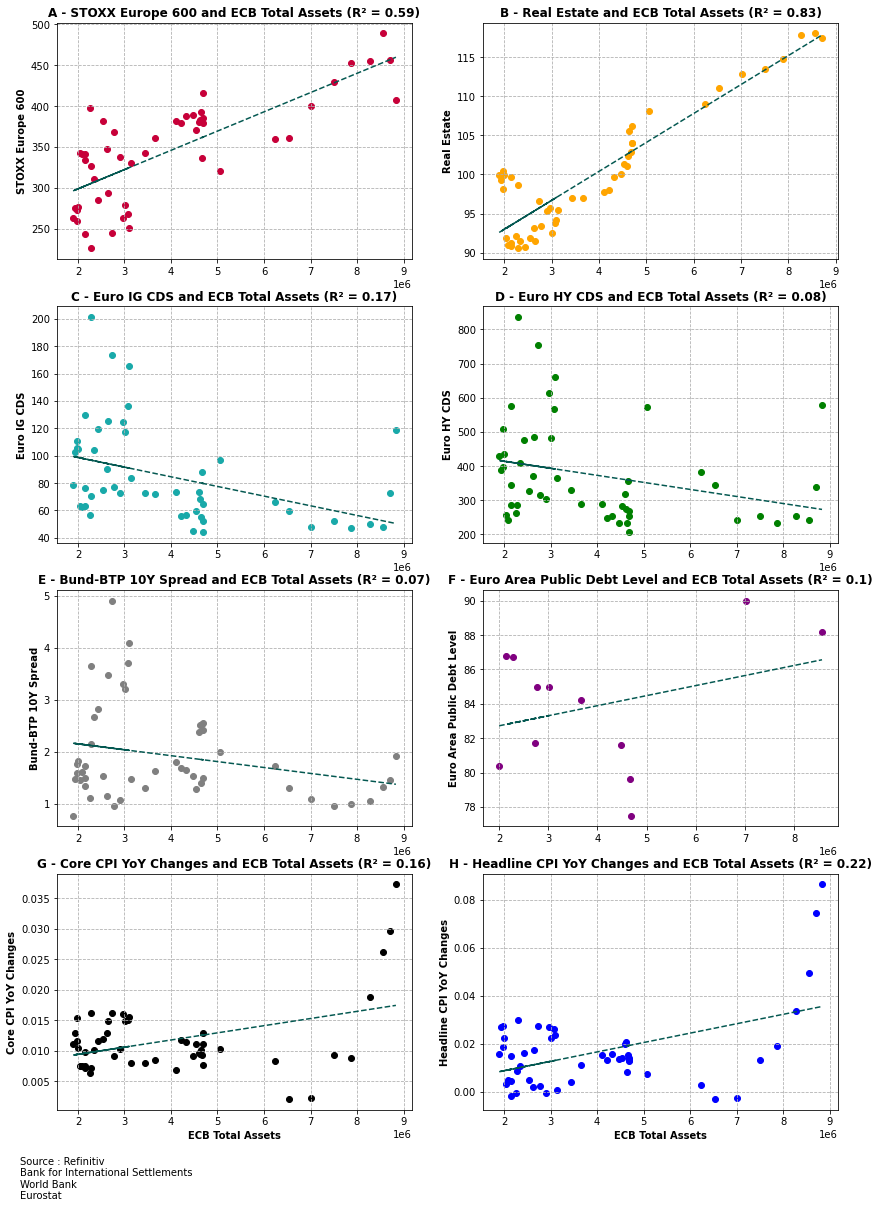

In [983]:
df_test = pd.DataFrame(pdr.get_data_fred(['ECBASSETSW'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()
df_testt = pd.DataFrame(pdr.get_data_fred(['ECBASSETSW'], start='2010-01-01', end = '2022-06-30')).resample('Y').last()

df = pd.DataFrame(pdr.get_data_yahoo('^STOXX', start = '2010-01-01', end = '2022-06-30')['Adj Close']).resample('Q').last()

df_test2 = pd.DataFrame(pdr.get_data_fred(['QXMR628BIS'], start='2010-01-01', end = '2022-06-30')).resample('Q').last()
df_test3 = pd.DataFrame(pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\Data Satnam.xlsx",sheet_name = 'Credit'))
df_test3 = df_test3.set_index('Date')
df_test3 = df_test3.resample('Q').last()

df_test4 = pd.DataFrame(pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\Data Satnam.xlsx",sheet_name = 'Credit'))
df_test4 = df_test4.set_index('Date')
df_test4 = df_test4.resample('Q').last()


df_test5 = pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\Data Satnam.xlsx",sheet_name = '10Y')
df_test5 = df_test5.set_index('Date')
df_test5 = df_test5.resample('Q').last()

df_test6 = pd.DataFrame(pdr.get_data_fred(['CPHPLA01EZM661N'], start='2009-01-01', end = '2022-06-30')).resample('Q').last().pct_change(4)

df_test7 = pd.read_excel(r"C:\Users\ssatn\Documents\02 - Cours\04 - NEOMA\01 - Mémoire NEOMA\gov_10q_ggdebt__custom_2130922_page_spreadsheet.xlsx", sheet_name = 'Sheet2')
df_test7 = df_test7.set_index('Date')
df_test7 = df_test7.resample('Y').last()


df_test8 = pd.DataFrame(pdr.get_data_fred(['CP0000EZ19M086NEST'], start='2009-01-01', end = '2022-06-30')).resample('Q').last().pct_change(4)

from numpy.polynomial.polynomial import polyfit

fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8] ) = plt.subplots(4,2, figsize=(14,20), gridspec_kw={'height_ratios': [4, 4, 4, 4]})

ax1.scatter(df_test['ECBASSETSW'], df['Adj Close'], color = '#C70039')
OLS = np.polyfit(df_test['ECBASSETSW'].astype(float), df['Adj Close'].astype(float), 1)
b, m = polyfit(df_test['ECBASSETSW'], df['Adj Close'], 1)
ax1.plot(df_test['ECBASSETSW'], b + m * df_test['ECBASSETSW'], '--', color = '#045851')

ax2.scatter(df_test['ECBASSETSW'][:-1], df_test2['QXMR628BIS'], color = 'orange')
OLS = np.polyfit(df_test['ECBASSETSW'][:-1].astype(float), df_test2['QXMR628BIS'].astype(float), 1)
b, m = polyfit(df_test['ECBASSETSW'][:-1], df_test2['QXMR628BIS'], 1)
ax2.plot(df_test['ECBASSETSW'][:-1], b + m * df_test['ECBASSETSW'][:-1], '--', color = '#045851')

ax3.scatter(df_test['ECBASSETSW'], df_test3['CDS IG'], color = '#19A9A9')
OLS = np.polyfit(df_test['ECBASSETSW'].astype(float), df_test3['CDS IG'].astype(float), 1)
b, m = polyfit(df_test['ECBASSETSW'], df_test3['CDS IG'], 1)
ax3.plot(df_test['ECBASSETSW'], b + m * df_test['ECBASSETSW'], '--', color = '#045851')

ax4.scatter(df_test['ECBASSETSW'], df_test4['CDS HY'], color = 'green')
OLS = np.polyfit(df_test['ECBASSETSW'].astype(float), df_test4['CDS HY'].astype(float), 1)
b, m = polyfit(df_test['ECBASSETSW'], df_test4['CDS HY'], 1)
ax4.plot(df_test['ECBASSETSW'], b + m * df_test['ECBASSETSW'], '--', color = '#045851')

ax5.scatter(df_test['ECBASSETSW'], df_test5['SPREAD IT'][:-1], color = 'grey')
OLS = np.polyfit(df_test['ECBASSETSW'], df_test5['SPREAD IT'][:-1], 1)
b, m = polyfit(df_test['ECBASSETSW'], df_test5['SPREAD IT'][:-1], 1)
ax5.plot(df_test['ECBASSETSW'], b + m * df_test['ECBASSETSW'], '--', color = '#045851')

ax6.scatter(df_testt['ECBASSETSW'][:-1], df_test7['EMU'], color = 'purple')
OLS = np.polyfit(df_testt['ECBASSETSW'][:-1].astype(float), df_test7['EMU'].astype(float), 1)
b, m = polyfit(df_testt['ECBASSETSW'][:-1], df_test7['EMU'], 1)
ax6.plot(df_testt['ECBASSETSW'][:-1], b + m * df_testt['ECBASSETSW'][:-1], '--', color = '#045851')

ax7.scatter(df_test['ECBASSETSW'], df_test6['CPHPLA01EZM661N'][4:], color = 'black')
OLS = np.polyfit(df_test['ECBASSETSW'].astype(float), df_test6['CPHPLA01EZM661N'][4:].astype(float), 1)
b, m = polyfit(df_test['ECBASSETSW'], df_test6['CPHPLA01EZM661N'][4:], 1)
ax7.plot(df_test['ECBASSETSW'], b + m * df_test['ECBASSETSW'], '--', color = '#045851')

ax8.scatter(df_test['ECBASSETSW'], df_test8['CP0000EZ19M086NEST'][4:], color = 'blue')
OLS = np.polyfit(df_test['ECBASSETSW'].astype(float), df_test8['CP0000EZ19M086NEST'][4:].astype(float), 1)
b, m = polyfit(df_test['ECBASSETSW'], df_test8['CP0000EZ19M086NEST'][4:], 1)
ax8.plot(df_test['ECBASSETSW'], b + m * df_test['ECBASSETSW'], '--', color = '#045851')

ax1.set_ylabel('STOXX Europe 600', fontweight = 'bold')
ax2.set_ylabel('Real Estate', fontweight = 'bold')
ax3.set_ylabel('Euro IG CDS', fontweight = 'bold')
ax4.set_ylabel('Euro HY CDS', fontweight = 'bold')
ax5.set_ylabel('Bund-BTP 10Y Spread', fontweight = 'bold')
ax6.set_ylabel('Euro Area Public Debt Level', fontweight = 'bold')
ax7.set_ylabel('Core CPI YoY Changes', fontweight = 'bold')
ax8.set_ylabel('Headline CPI YoY Changes', fontweight = 'bold')

ax7.set_xlabel('ECB Total Assets', fontweight = 'bold')
ax8.set_xlabel('ECB Total Assets', fontweight = 'bold')

ax1.grid(linestyle = 'dashed')
ax2.grid(linestyle = 'dashed')
ax3.grid(linestyle = 'dashed')
ax4.grid(linestyle = 'dashed')
ax5.grid(linestyle = 'dashed')
ax6.grid(linestyle = 'dashed')
ax7.grid(linestyle = 'dashed')
ax8.grid(linestyle = 'dashed')

ax1.set_title('A - STOXX Europe 600 and ECB Total Assets (R² = 0.59)', fontweight = 'bold')
ax2.set_title('B - Real Estate and ECB Total Assets (R² = 0.83)',  fontweight = 'bold')
ax3.set_title('C - Euro IG CDS and ECB Total Assets (R² = 0.17)', fontweight = 'bold')
ax4.set_title('D - Euro HY CDS and ECB Total Assets (R² = 0.08)', fontweight = 'bold')
ax5.set_title('E - Bund-BTP 10Y Spread and ECB Total Assets (R² = 0.07)', fontweight = 'bold')
ax6.set_title('F - Euro Area Public Debt Level and ECB Total Assets (R² = 0.1)', fontweight = 'bold')
ax7.set_title('G - Core CPI YoY Changes and ECB Total Assets (R² = 0.16)', fontweight = 'bold')
ax8.set_title('H - Headline CPI YoY Changes and ECB Total Assets (R² = 0.22)', fontweight = 'bold')

ax7.annotate('Source : Refinitiv \nBank for International Settlements \nWorld Bank \nEurostat', (0.12,-0.3), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


In [ ]:
df_test['ECBASSETSW'], df['Adj Close']
df_test['ECBASSETSW'][:-1], df_test2['QXMR628BIS']
df_test['ECBASSETSW'], df_test3['CDS IG']
df_test['ECBASSETSW'], df_test4['CDS HY']
df_test['ECBASSETSW'], df_test5['SPREAD IT'][:-1]
df_testt['ECBASSETSW'][:-1], df_test7['EMU']
df_test['ECBASSETSW'], df_test6['CPHPLA01EZM661N'][4:]
df_test['ECBASSETSW'], df_test8['CP0000EZ19M086NEST'][4:]

In [910]:
import statsmodels.api as sm

#df = sm.datasets.get_rdataset('Duncan', 'carData').data
x, y = df_test['ECBASSETSW'], df_test8['CP0000EZ19M086NEST'][4:]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CP0000EZ19M086NEST   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     13.77
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           0.000536
Time:                        20:02:11   Log-Likelihood:                 139.64
No. Observations:                  50   AIC:                            -275.3
Df Residuals:                      48   BIC:                            -271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.186      0.8

# FIGURE 34 : %PUBLIC DEBT HELD BY FEDERAL RESERVE

Text(-80, -20, 'Source : U.S. Department of the Treasury. Fiscal Service,')

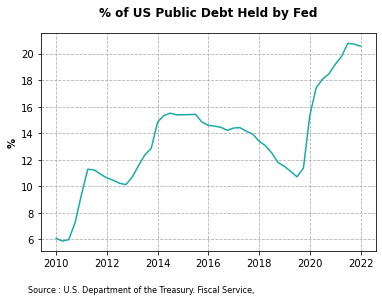

In [975]:
df_test = pd.DataFrame(pdr.get_data_fred(['GFDEBTN','FDHBFRBN'], start='2010-01-01', end = '2022-06-30'))
df_test['GFDEBTN'] = df_test['GFDEBTN'] / 1000

plt.plot(df_test.index, df_test['FDHBFRBN']/df_test['GFDEBTN'] *100, color ="#19A9A9")



#plt.plot(df_test.index, df_test['CPIAUCSL'],color ="#6F6F6F")
plt.grid(linestyle ='dashed')
#plt.legend(['S&P 500 Index', 'All-Transactions House Price Index for the US', 'STOXX 600 Index', 'Residential Property Prices for Euro area'], loc="upper left")#, bbox_to_anchor=(0.71, 0.81))
plt.ylabel('%',fontweight="bold")
plt.title("% of US Public Debt Held by Fed", fontweight="bold", x=0.5, y=1.05)
plt.annotate('Source : U.S. Department of the Treasury. Fiscal Service,', (0.2,-0.11), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='bottom')


1

4

# REGRESSION

In [ ]:
ax3.scatter(df_test['WALCL'], df_test3['BAMLC0A0CM'], color = '#19A9A9')
OLS = np.polyfit(df_test['WALCL'].astype(float), df_test3['BAMLC0A0CM'].astype(float), 1)
b, m = polyfit(df_test['WALCL'], df_test3['BAMLC0A0CM'], 1)
ax3.plot(df_test['WALCL'], b + m * df_test['WALCL'], '--', color = '#045851')

C:\Users\ssatn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


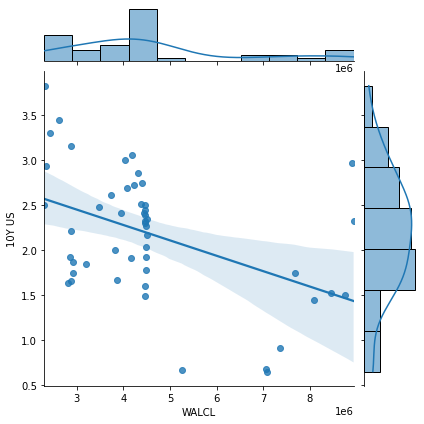

In [818]:
# BS vs CPI
import seaborn as sns
sns.jointplot(df_test['WALCL'], df_test5['10Y US'][:-1], kind = 'reg')